<a href="https://colab.research.google.com/github/Negin1164/Tutorials/blob/main/Data_exploration_python_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Exploration

Exploratory Data Analysis (EDA) is a process to uncover the hidden patterns and information in data by exmining data properties such as shape, type and distribution, etc. EDA helps to find relevant features and ask the right questions about the data. <br>

EDA steps are listed in the following: <br>

- Examining the properties of the variables
- Discovering relationships between variables
- Exploring useful features which are relevant to target variables and can help to explain it.
Checking if our assumptions are in the data.




## 1.1.
Is the following statement true or false?

The goal of exploratory data analysis is to understand the data and find the relevant features that help explain your variable of interest.

- [x] a) True

- [ ] b) False

## 1.2.
Suppose you're given a rating dataset, where customers enter comments into a text box and select their rating of the product on a 1-5 scale. Which of the following is likely to be necessary to clean the data before it is usable? See the following example.

- [ ] a) 3

- [x] b) This product was a real-life changer but didn't last long. Therefore, I give it a three.

- [x] c) Awesome!

# 2. Data cleansing I: handling with variable type


## 2.1.

Determine the types of the below-given variables:<br>
Age [numerical, continuous, ratio]() <br>
Salary [numerical, continuous, ratio]()<br>
Income [numerical, continuous, ratio]()<br>
Customer type [categorical, nominal]()<br>
Stock price [numerical, continuous, ratio]()<br>

## 2.2.

Using the movie data, we have studied in this lesson. Complete the following tasks:<br>

a. Select a variable from the movie dataset and discuss the variable type of this variable<br>

b. Categorize a variable of your choice and assign a name to it<br>

c. Count the number of rows for each category<br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def file_locator(file_name):

    import os
    main_dir = os.getcwd()

    for dir, folder, files in os.walk(main_dir):
      for file in files:
        if file == file_name:
          file_path = os.path.join(dir,file)
    return file_path

file_path = file_locator('movies.csv')

In [ ]:
df = pd.read_csv(file_path)
df.head(n=2)

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   

                                         Description      Director  \
0  A group of intergalactic criminals are forced ...    James Gunn   
1  Following clues to the origin of mankind, a te...  Ridley Scott   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 12 entries, Rank to Metascore
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
df.describe(include='O')
# df.nunique().head(3)

Title                    Genre  \
count       1000                     1000   
unique       999                      207   
top     The Host  Action,Adventure,Sci-Fi   
freq           2                       50   

                                              Description      Director  \
count                                                1000          1000   
unique                                               1000           644   
top     A group of intergalactic criminals are forced ...  Ridley Scott   
freq                                                    1             8   

                                                   Actors  
count                                                1000  
unique                                                996  
top     Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...  
freq                                                    2

### a.

Select a variable from the movie dataset and discuss the variable type of this variable<br>

In [ ]:
variable_type = pd.Series(['continuous numerical',
                           'string variable',
                           'nominal categorical',
                           'string variable',
                           'nominal categorical',
                           'nominal categorical',
                           'discrete numerical',
                           'discrete numerical',
                           'discrete numerical',
                           'continuous numerical',
                           'continuous numerical',
                           'discrete numerical'],index= df.dtypes.index)

df_dtype = pd.concat([df.dtypes,df.nunique(), round(df.nunique()*100/len(df)), variable_type], axis=1)
df_dtype.columns = ['data type' , 'No. of categories', 'categories/samples ratio %', 'variable_type']
df_dtype

data type  No. of categories  categories/samples ratio %  \
Rank                   int64               1000                       100.0   
Title                 object                999                       100.0   
Genre                 object                207                        21.0   
Description           object               1000                       100.0   
Director              object                644                        64.0   
Actors                object                996                       100.0   
Year                   int64                 11                         1.0   
Runtime (Minutes)      int64                 94                         9.0   
Rating               float64                 55                         6.0   
Votes                  int64                997                       100.0   
Revenue (Millions)   float64                814                        81.0   
Metascore            float64                 84                         8.0   

                           variable_type  
Rank                continuous numerical  
Title                    string variable  
Genre                nominal categorical  
Description              string variable  
Director             nominal categorical  
Actors               nominal categorical  
Year                  discrete numerical  
Runtime (Minutes)     discrete numerical  
Rating                discrete numerical  
Votes               continuous numerical  
Revenue (Millions)  continuous numerical  
Metascore             discrete numerical

### b.
Categorize a variable of your choice and assign a name to it<br>

In [ ]:
df['Revenue category'] = pd.cut(df['Revenue (Millions)'] , bins=3, right=True, labels=["low", "medium", "high"])
# df['Revenue (Millions)'].value_counts(bins=3)

### c.
Count the number of rows for each category<br>

In [ ]:
df['Revenue category'].value_counts()

low       835
medium     34
high        3
Name: Revenue category, dtype: int64

Metascore and Rating can be converted to discrete numerical

## 2.3.

Is it possible to convert categorical variable into numerical one? If so, how can you make that? <br>
[yes by assigning a number to each category]()


In [ ]:
df['Genre_discrete']=df.Genre.astype('category').cat.codes

In [ ]:
df['Genre_discrete'].nunique() == df.Genre.nunique()

True

In [ ]:
df.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore Revenue category  \
0     8.1  757074              333.13       76.0           medium   
1     7.0  485820              126.46       65.0              low   
2     7.3  157606              138.12       62.0              low   
3     7.2   60545              270.32       59.0              low   
4     6.2  393727              325.02       40.0           medium   

   Genre_discrete  
0              11  
1              85  
2             195  
3              92  
4               7

In [ ]:
df['Genre_discrete'].unique()

array([ 11,  85, 195,  92,   7, 116, 108,   2,  74,  80, 102,  89,  18,
        55, 100, 173,  76, 149, 142,   5, 183,   3,  49,  75,  13, 112,
       190,  71,  31,  26,  72, 146, 176, 118, 193, 144, 178, 162,  40,
       161,  37, 153,  53,  77,  20,  97, 139, 110,  17,  93, 192, 174,
       145,  99, 147,  50, 201,  45,  15, 166,  70,  66,   0,  68, 122,
        62, 168, 169, 199, 200, 120,  98, 186, 172,  36,   4,  86,  22,
       206,  12, 158,  34,  90,  83, 177,   6,  16, 134, 191, 151, 203,
       185, 154, 141, 194,  39,  60, 106,   9, 164, 109, 160,  10,  41,
       171, 181,  38, 180,  81, 205, 104,   1,  42,  35, 132, 105,  46,
       130, 143,  54, 167, 182, 127, 126, 124, 114,  65, 133,  51,  27,
       125,  87,  19, 137,  14,  61, 131, 115,  48,  33,  52,   8,  95,
        84,  47,  63,  28, 113,  30, 198, 204,  73, 107,  67, 187,  44,
       135,  88, 159,  23,  43, 196, 119, 138, 163, 188, 165, 150, 202,
        96, 175,  32,  78, 170, 136,  69, 184, 157, 111,  91,  2

In [ ]:
pd.concat([df['Genre'],df['Genre_discrete']], axis=1)

Genre  Genre_discrete
0       Action,Adventure,Sci-Fi              11
1      Adventure,Mystery,Sci-Fi              85
2               Horror,Thriller             195
3       Animation,Comedy,Family              92
4      Action,Adventure,Fantasy               7
5      Action,Adventure,Fantasy               7
6            Comedy,Drama,Music             116
7                        Comedy             108
8    Action,Adventure,Biography               2
9       Adventure,Drama,Romance              74
10     Adventure,Family,Fantasy              80
11      Biography,Drama,History             102
12      Action,Adventure,Sci-Fi              11
13   Animation,Adventure,Comedy              89
14          Action,Comedy,Drama              18
15   Animation,Adventure,Comedy              89
16      Biography,Drama,History             102
17              Action,Thriller              55
18              Biography,Drama             100
19         Drama,Mystery,Sci-Fi             173
20     Adventure,Drama,Thriller              76
21                        Drama             149
22           Crime,Drama,Horror             142
23   Animation,Adventure,Comedy              89
24      Action,Adventure,Sci-Fi              11
25                       Comedy             108
26       Action,Adventure,Drama               5
27              Horror,Thriller             195
28                       Comedy             108
29       Action,Adventure,Drama               5
30                       Comedy             108
31               Drama,Thriller             183
32      Action,Adventure,Sci-Fi              11
33      Action,Adventure,Comedy               3
34         Action,Horror,Sci-Fi              49
35      Action,Adventure,Sci-Fi              11
36       Adventure,Drama,Sci-Fi              75
37     Action,Adventure,Fantasy               7
38     Action,Adventure,Western              13
39                 Comedy,Drama             112
40   Animation,Adventure,Comedy              89
41                        Drama             149
42                       Horror             190
43      Biography,Drama,History             102
44                        Drama             149
45     Action,Adventure,Fantasy               7
46               Drama,Thriller             183
47      Adventure,Drama,Fantasy              71
48      Action,Adventure,Sci-Fi              11
49                        Drama             149
50     Action,Adventure,Fantasy               7
51     Action,Adventure,Fantasy               7
52                 Comedy,Drama             112
53        Action,Crime,Thriller              31
54           Action,Crime,Drama              26
55      Adventure,Drama,History              72
56        Crime,Horror,Thriller             146
57                Drama,Romance             176
58         Comedy,Drama,Romance             118
59              Biography,Drama             100
60      Action,Adventure,Sci-Fi              11
61      Horror,Mystery,Thriller             193
62          Crime,Drama,Mystery             144
63       Drama,Romance,Thriller             178
64         Drama,Mystery,Sci-Fi             173
65      Action,Adventure,Comedy               3
66       Drama,History,Thriller             162
67      Action,Adventure,Sci-Fi              11
68                        Drama             149
69        Action,Drama,Thriller              40
70                Drama,History             161
71         Action,Drama,Romance              37
72                Drama,Fantasy             153
73                Drama,Romance             176
74   Animation,Adventure,Comedy              89
75     Action,Adventure,Fantasy               7
76                Action,Sci-Fi              53
77          Adventure,Drama,War              77
78     Action,Adventure,Fantasy               7
79        Action,Comedy,Fantasy              20
80      Action,Adventure,Sci-Fi              11
81                 Comedy,Drama             112
82       Biography,Comedy,Crime           

## 2.4.

While continuous data is generally preferred over discrete data, please indicate circumstances where discrete is the preferred data type although continuous data is available for the same characteristic. <br>
[In classification problems, categorical data are used as they fit the classification techniques and method. In regression problems, continuous data is required.]()

## 2.5.

While continuous data is measured and attribute data is counted, there is sometimes confusion if some specific dataset should be considered continuous or attribute. Provide some examples of confusing datasets and your inference.


# 3. Data Cleansing 2: Handling with Missing Variable

In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.<br>

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:<br>

3.1. Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook. <br>

3.2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?<br>

3.3. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.<br>

3.4.This time, fill in the missing values using interpolation (extrapolation).<br>

The main idea in interpolation is to fill in the missing values between the two missing values using these non-missing values. For example, if we have a missing value between two missing values, we can average the two missing values and assign them to the missing one.
However, interpolation requires a meaningful sequence of observations and a trend in the ordered data. For this reason, this method is especially popular among time-series analyses. However, applying to unsorted data may be erroneous. <br>
`.interpolate(method ='linear', limit_direction ='forward')`


3.5. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?<br>


## 3.1.

Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook. <br>

In [ ]:
File_Name = file_locator('states_all.csv')

df = pd.read_csv(File_Name)
df.head(2)

PRIMARY_KEY    STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0  1992_ALABAMA  ALABAMA  1992     NaN      2678885.0         304177.0   
1   1992_ALASKA   ALASKA  1992     NaN      1049591.0         106780.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   

   SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
0                      735036.0                NaN   
1                      350902.0                NaN   

   CAPITAL_OUTLAY_EXPENDITURE  GRADES_PK_G  GRADES_KG_G  GRADES_4_G  \
0                    174053.0       8224.0      55460.0     57948.0   
1                     37451.0       2371.0      10152.0      9748.0   

   GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  \
0     58025.0      41167.0           NaN            NaN      731634.0   
1      8789.0       6714.0           NaN            NaN      122487.0   

   AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0             208.0             252.0                207.0   
1               NaN               NaN                  NaN   

   AVG_READING_8_SCORE  
0                  NaN  
1                  NaN

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 25 entries, PRIMARY_KEY to AVG_READING_8_SCORE
dtypes: float64(22), int64(1), object(2)
memory usage: 335.1+ KB


In [ ]:
df_datatype = pd.concat([df.dtypes,df.nunique(),
                         round(df.nunique()*100/len(df),2),
                         df.isnull().sum(),
                         round(df.isnull().sum()*100/len(df),2)],
                        axis=1)

df_datatype.columns = ['data type' , 'No. of categories' ,'No. of categories %','missing values' , 'missing values %']

df_datatype.sort_values(by='missing values %', ascending=False, inplace=True)

In [ ]:
df_datatype

data type  No. of categories  \
AVG_READING_8_SCORE            float64                 39   
AVG_MATH_4_SCORE               float64                 50   
AVG_MATH_8_SCORE               float64                 57   
AVG_READING_4_SCORE            float64                 43   
GRADES_1_8_G                   float64               1020   
GRADES_9_12_G                  float64               1070   
ENROLL                         float64               1224   
OTHER_EXPENDITURE              float64               1222   
SUPPORT_SERVICES_EXPENDITURE   float64               1275   
CAPITAL_OUTLAY_EXPENDITURE     float64               1275   
INSTRUCTION_EXPENDITURE        float64               1275   
TOTAL_EXPENDITURE              float64               1275   
LOCAL_REVENUE                  float64               1275   
STATE_REVENUE                  float64               1251   
FEDERAL_REVENUE                float64               1275   
TOTAL_REVENUE                  float64               1274   
GRADES_PK_G                    float64               1483   
GRADES_KG_G                    float64               1613   
GRADES_4_G                     float64               1612   
GRADES_8_G                     float64               1620   
GRADES_12_G                    float64               1608   
GRADES_ALL_G                   float64               1629   
STATE                           object                 53   
YEAR                             int64                 33   
PRIMARY_KEY                     object               1715   

                              No. of categories %  missing values  \
AVG_READING_8_SCORE                          2.27            1153   
AVG_MATH_4_SCORE                             2.92            1150   
AVG_MATH_8_SCORE                             3.32            1113   
AVG_READING_4_SCORE                          2.51            1065   
GRADES_1_8_G                                59.48             695   
GRADES_9_12_G                               62.39             644   
ENROLL                                      71.37             491   
OTHER_EXPENDITURE                           71.25             491   
SUPPORT_SERVICES_EXPENDITURE                74.34             440   
CAPITAL_OUTLAY_EXPENDITURE                  74.34             440   
INSTRUCTION_EXPENDITURE                     74.34             440   
TOTAL_EXPENDITURE                           74.34             440   
LOCAL_REVENUE                               74.34             440   
STATE_REVENUE                               72.94             440   
FEDERAL_REVENUE                             74.34             440   
TOTAL_REVENUE                               74.29             440   
GRADES_PK_G                                 86.47             173   
GRADES_KG_G                                 94.05              83   
GRADES_4_G                                  93.99              83   
GRADES_8_G                                  94.46              83   
GRADES_12_G                                 93.76              83   
GRADES_ALL_G                                94.99              83   
STATE                                        3.09               0   
YEAR                                         1.92               0   
PRIMARY_KEY                                100.00               0   

                              missing values %  
AVG_READING_8_SCORE                      67.23  
AVG_MATH_4_SCORE                         67.06  
AVG_MATH_8_SCORE                         64.90  
AVG_READING_4_SCORE                      62.10  
GRADES_1_8_G                             40.52  
GRADES_9_12_G                            37.55  
ENROLL                                   28.63  
OTHER_EXPENDITURE                        28.63  
SUPPORT_SERVICES_EXPENDITURE             25.66  
CAPITAL_OUTLAY_EXPENDITURE               25.66  
INSTRUCTION_EXPENDITURE                  25.66  
TOTAL_EXPENDITURE                        25.66  
LOCAL_REVE

In [ ]:
df_datatype = df_datatype.loc[df_datatype['missing values']!=0]
df_datatype

data type  No. of categories  \
AVG_READING_8_SCORE            float64                 39   
AVG_MATH_4_SCORE               float64                 50   
AVG_MATH_8_SCORE               float64                 57   
AVG_READING_4_SCORE            float64                 43   
GRADES_1_8_G                   float64               1020   
GRADES_9_12_G                  float64               1070   
ENROLL                         float64               1224   
OTHER_EXPENDITURE              float64               1222   
SUPPORT_SERVICES_EXPENDITURE   float64               1275   
CAPITAL_OUTLAY_EXPENDITURE     float64               1275   
INSTRUCTION_EXPENDITURE        float64               1275   
TOTAL_EXPENDITURE              float64               1275   
LOCAL_REVENUE                  float64               1275   
STATE_REVENUE                  float64               1251   
FEDERAL_REVENUE                float64               1275   
TOTAL_REVENUE                  float64               1274   
GRADES_PK_G                    float64               1483   
GRADES_KG_G                    float64               1613   
GRADES_4_G                     float64               1612   
GRADES_8_G                     float64               1620   
GRADES_12_G                    float64               1608   
GRADES_ALL_G                   float64               1629   

                              No. of categories %  missing values  \
AVG_READING_8_SCORE                          2.27            1153   
AVG_MATH_4_SCORE                             2.92            1150   
AVG_MATH_8_SCORE                             3.32            1113   
AVG_READING_4_SCORE                          2.51            1065   
GRADES_1_8_G                                59.48             695   
GRADES_9_12_G                               62.39             644   
ENROLL                                      71.37             491   
OTHER_EXPENDITURE                           71.25             491   
SUPPORT_SERVICES_EXPENDITURE                74.34             440   
CAPITAL_OUTLAY_EXPENDITURE                  74.34             440   
INSTRUCTION_EXPENDITURE                     74.34             440   
TOTAL_EXPENDITURE                           74.34             440   
LOCAL_REVENUE                               74.34             440   
STATE_REVENUE                               72.94             440   
FEDERAL_REVENUE                             74.34             440   
TOTAL_REVENUE                               74.29             440   
GRADES_PK_G                                 86.47             173   
GRADES_KG_G                                 94.05              83   
GRADES_4_G                                  93.99              83   
GRADES_8_G                                  94.46              83   
GRADES_12_G                                 93.76              83   
GRADES_ALL_G                                94.99              83   

                              missing values %  
AVG_READING_8_SCORE                      67.23  
AVG_MATH_4_SCORE                         67.06  
AVG_MATH_8_SCORE                         64.90  
AVG_READING_4_SCORE                      62.10  
GRADES_1_8_G                             40.52  
GRADES_9_12_G                            37.55  
ENROLL                                   28.63  
OTHER_EXPENDITURE                        28.63  
SUPPORT_SERVICES_EXPENDITURE             25.66  
CAPITAL_OUTLAY_EXPENDITURE               25.66  
INSTRUCTION_EXPENDITURE                  25.66  
TOTAL_EXPENDITURE                        25.66  
LOCAL_REVENUE                            25.66  
STATE_REVENUE                            25.66  
FEDERAL_REVENUE                          25.66  
TOTAL_REVENUE                            25.66  
GRADES_PK_G                              10.09  
GRADES_KG_G                               4.84  
GRADES_4_G                                4.84  
GRADES_8_G                                4.84  
GRADES_1

In [ ]:
df_datatype[df_datatype.index=='AVG_READING_8_SCORE']['data type']

AVG_READING_8_SCORE    float64
Name: data type, dtype: object

## 3.2.

Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?<br>


In [ ]:
import numpy as np
# drop those variable with more than 50% missing values

df_datatype.iloc[np.where(df_datatype['missing values %'] > 50)]


data type  No. of categories  No. of categories %  \
AVG_READING_8_SCORE   float64                 39                 2.27   
AVG_MATH_4_SCORE      float64                 50                 2.92   
AVG_MATH_8_SCORE      float64                 57                 3.32   
AVG_READING_4_SCORE   float64                 43                 2.51   

                     missing values  missing values %  
AVG_READING_8_SCORE            1153             67.23  
AVG_MATH_4_SCORE               1150             67.06  
AVG_MATH_8_SCORE               1113             64.90  
AVG_READING_4_SCORE            1065             62.10

In [ ]:
columns_to_drop = df_datatype.iloc[np.where(df_datatype['missing values %'] > 50)].index

print(f"""columns, {columns_to_drop.to_list()} can be dropped since more than 50% of data is misssing
,for the rest of variable, the missing values can be replaced by some values""")

columns, ['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE'] can be dropped since more than 50% of data is misssing
,for the rest of variable, the missing values can be replaced by some values


In [ ]:
df.drop(columns_to_drop.to_list(), axis=1, inplace=True)
df

PRIMARY_KEY                 STATE  YEAR     ENROLL  \
0                  1992_ALABAMA               ALABAMA  1992        NaN   
1                   1992_ALASKA                ALASKA  1992        NaN   
2                  1992_ARIZONA               ARIZONA  1992        NaN   
3                 1992_ARKANSAS              ARKANSAS  1992        NaN   
4               1992_CALIFORNIA            CALIFORNIA  1992        NaN   
5                 1992_COLORADO              COLORADO  1992        NaN   
6              1992_CONNECTICUT           CONNECTICUT  1992        NaN   
7                 1992_DELAWARE              DELAWARE  1992        NaN   
8     1992_DISTRICT_OF_COLUMBIA  DISTRICT_OF_COLUMBIA  1992        NaN   
9                  1992_FLORIDA               FLORIDA  1992        NaN   
10                 1992_GEORGIA               GEORGIA  1992        NaN   
11                  1992_HAWAII                HAWAII  1992        NaN   
12                   1992_IDAHO                 IDAHO  1992        NaN   
13                1992_ILLINOIS              ILLINOIS  1992        NaN   
14                 1992_INDIANA               INDIANA  1992        NaN   
15                    1992_IOWA                  IOWA  1992        NaN   
16                  1992_KANSAS                KANSAS  1992        NaN   
17                1992_KENTUCKY              KENTUCKY  1992        NaN   
18               1992_LOUISIANA             LOUISIANA  1992        NaN   
19                   1992_MAINE                 MAINE  1992        NaN   
20                1992_MARYLAND              MARYLAND  1992        NaN   
21           1992_MASSACHUSETTS         MASSACHUSETTS  1992        NaN   
22                1992_MICHIGAN              MICHIGAN  1992        NaN   
23               1992_MINNESOTA             MINNESOTA  1992        NaN   
24             1992_MISSISSIPPI           MISSISSIPPI  1992        NaN   
25                1992_MISSOURI              MISSOURI  1992        NaN   
26                 1992_MONTANA               MONTANA  1992        NaN   
27                1992_NEBRASKA              NEBRASKA  1992        NaN   
28                  1992_NEVADA                NEVADA  1992        NaN   
29           1992_NEW_HAMPSHIRE         NEW_HAMPSHIRE  1992        NaN   
30              1992_NEW_JERSEY            NEW_JERSEY  1992        NaN   
31              1992_NEW_MEXICO            NEW_MEXICO  1992        NaN   
32                1992_NEW_YORK              NEW_YORK  1992        NaN   
33          1992_NORTH_CAROLINA        NORTH_CAROLINA  1992        NaN   
34            1992_NORTH_DAKOTA          NORTH_DAKOTA  1992        NaN   
35                    1992_OHIO                  OHIO  1992        NaN   
36                1992_OKLAHOMA              OKLAHOMA  1992        NaN   
37                  1992_OREGON                OREGON  1992        NaN   
38            1992_PENNSYLVANIA          PENNSYLVANIA  1992        NaN   
39            1992_RHODE_ISLAND          RHODE_ISLAND  1992        NaN   
40          1992_SOUTH_CAROLINA        SOUTH_CAROLINA  1992        NaN   
41            1992_SOUTH_DAKOTA          SOUTH_DAKOTA  1992        NaN   
42               1992_TENNESSEE             TENNESSEE  1992        NaN   
43                   1992_TEXAS                 TEXAS  1992        NaN   
44                    1992_UTAH                  UTAH  1992        NaN   
45                 1992_VERMONT               VERMONT  1992        NaN   
46                1992_VIRGINIA              VIRGINIA  1992        NaN   
47              1992_WASHINGTON            WASHINGTON  1992        NaN   
48           1992_WEST_VIRGINIA         WEST_VIRGINIA  1992        NaN   
49               1992_WISCONSIN             WISCONSIN  1992        NaN   
50                 1992_WYOMING               WYOMING  1992        NaN   
51                 1993_ALABAMA               ALABAMA  1993   727716.0   
52                  1993_ALASKA                ALASKA  1993   121156.0   
53                 1993_

In [ ]:
df_datatype.drop(index=columns_to_drop, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.describe()

YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1715.000000  1.224000e+03   1.275000e+03     1.275000e+03   
mean   2002.075219  9.175416e+05   9.102045e+06     7.677799e+05   
std       9.568621  1.066514e+06   1.175962e+07     1.146992e+06   
min    1986.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1994.000000  2.645145e+05   2.189504e+06     1.899575e+05   
50%    2002.000000  6.499335e+05   5.085826e+06     4.035480e+05   
75%    2010.000000  1.010532e+06   1.084516e+07     8.279320e+05   
max    2019.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.275000e+03   1.275000e+03       1.275000e+03   
mean    4.223743e+06   4.110522e+06       9.206242e+06   
std     5.549735e+06   5.489562e+06       1.199279e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.165776e+06   7.151210e+05       2.170404e+06   
50%     2.537754e+06   2.058996e+06       5.242672e+06   
75%     5.055548e+06   4.755293e+06       1.074420e+07   
max     5.090457e+07   3.610526e+07       8.532013e+07   

       INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
count             1.275000e+03                  1.275000e+03   
mean              4.768010e+06                  2.682587e+06   
std               6.300569e+06                  3.357214e+06   
min               2.655490e+05                  1.399630e+05   
25%               1.171336e+06                  6.380760e+05   
50%               2.658253e+06                  1.525471e+06   
75%               5.561959e+06                  3.222924e+06   
max               4.396452e+07                  2.605802e+07   

       OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE    GRADES_PK_G  \
count       1.224000e+03                1.275000e+03    1542.000000   
mean        4.299509e+05                9.034675e+05   17840.958495   
std         5.347893e+05                1.329473e+06   30016.603510   
min         1.154100e+04                1.270800e+04      96.000000   
25%         1.034492e+05                1.815070e+05    2199.750000   
50%         2.717040e+05                5.104280e+05    8258.000000   
75%         5.172222e+05                9.661480e+05   22691.750000   
max         3.995951e+06                1.022366e+07  256222.000000   

         GRADES_KG_G     GRADES_4_G     GRADES_8_G    GRADES_12_G  \
count    1632.000000    1632.000000    1632.000000    1632.000000   
mean    68810.962010   69166.507966   68106.537377   58420.870711   
std     80671.033008   79957.990356   77965.847263   67438.530709   
min      5122.000000    4577.000000    3371.000000    2572.000000   
25%     19029.750000   18971.500000   19594.250000   16076.500000   
50%     48122.000000   49087.000000   47880.000000   39408.000000   
75%     78864.250000   78504.250000   78976.000000   69397.250000   
max    535379.000000  493415.000000  500143.000000  498403.000000   

       GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  
count  1.020000e+03   1.071000e+03  1.632000e+03  
mean   5.779547e+05   2.820691e+05  9.139695e+05  
std    6.757837e+05   3.307098e+05  1.055893e+06  
min    3.769800e+04   1.353000e+04  6.844900e+04  
25%    1.649250e+05   8.060800e+04  2.480832e+05  
50%    4.051115e+05   1.869190e+05  6.458050e+05  
75%    6.439752e+05   3.223280e+05  1.043420e+06  
max    3.929869e+06   2.013687e+06  6.441557e+06

In [ ]:
df_impute_median = df.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_impute_median[col] = df_impute_median[col].fillna(df_impute_median[col].median())

In [ ]:
df_impute_median.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

In [ ]:
df.describe()

YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1715.000000  1.224000e+03   1.275000e+03     1.275000e+03   
mean   2002.075219  9.175416e+05   9.102045e+06     7.677799e+05   
std       9.568621  1.066514e+06   1.175962e+07     1.146992e+06   
min    1986.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1994.000000  2.645145e+05   2.189504e+06     1.899575e+05   
50%    2002.000000  6.499335e+05   5.085826e+06     4.035480e+05   
75%    2010.000000  1.010532e+06   1.084516e+07     8.279320e+05   
max    2019.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.275000e+03   1.275000e+03       1.275000e+03   
mean    4.223743e+06   4.110522e+06       9.206242e+06   
std     5.549735e+06   5.489562e+06       1.199279e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.165776e+06   7.151210e+05       2.170404e+06   
50%     2.537754e+06   2.058996e+06       5.242672e+06   
75%     5.055548e+06   4.755293e+06       1.074420e+07   
max     5.090457e+07   3.610526e+07       8.532013e+07   

       INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
count             1.275000e+03                  1.275000e+03   
mean              4.768010e+06                  2.682587e+06   
std               6.300569e+06                  3.357214e+06   
min               2.655490e+05                  1.399630e+05   
25%               1.171336e+06                  6.380760e+05   
50%               2.658253e+06                  1.525471e+06   
75%               5.561959e+06                  3.222924e+06   
max               4.396452e+07                  2.605802e+07   

       OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE    GRADES_PK_G  \
count       1.224000e+03                1.275000e+03    1542.000000   
mean        4.299509e+05                9.034675e+05   17840.958495   
std         5.347893e+05                1.329473e+06   30016.603510   
min         1.154100e+04                1.270800e+04      96.000000   
25%         1.034492e+05                1.815070e+05    2199.750000   
50%         2.717040e+05                5.104280e+05    8258.000000   
75%         5.172222e+05                9.661480e+05   22691.750000   
max         3.995951e+06                1.022366e+07  256222.000000   

         GRADES_KG_G     GRADES_4_G     GRADES_8_G    GRADES_12_G  \
count    1632.000000    1632.000000    1632.000000    1632.000000   
mean    68810.962010   69166.507966   68106.537377   58420.870711   
std     80671.033008   79957.990356   77965.847263   67438.530709   
min      5122.000000    4577.000000    3371.000000    2572.000000   
25%     19029.750000   18971.500000   19594.250000   16076.500000   
50%     48122.000000   49087.000000   47880.000000   39408.000000   
75%     78864.250000   78504.250000   78976.000000   69397.250000   
max    535379.000000  493415.000000  500143.000000  498403.000000   

       GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  
count  1.020000e+03   1.071000e+03  1.632000e+03  
mean   5.779547e+05   2.820691e+05  9.139695e+05  
std    6.757837e+05   3.307098e+05  1.055893e+06  
min    3.769800e+04   1.353000e+04  6.844900e+04  
25%    1.649250e+05   8.060800e+04  2.480832e+05  
50%    4.051115e+05   1.869190e+05  6.458050e+05  
75%    6.439752e+05   3.223280e+05  1.043420e+06  
max    3.929869e+06   2.013687e+06  6.441557e+06

In [ ]:
df['YEAR'].nunique()
df['YEAR'].value_counts()

1992    53
2003    53
2017    53
1990    53
2015    53
2013    53
2011    53
2009    53
2007    53
2005    53
2019    53
2002    53
1996    53
1994    53
2000    53
1998    53
1991    51
1995    51
1989    51
1988    51
1987    51
1986    51
2016    51
2014    51
2004    51
1997    51
2012    51
2010    51
1999    51
1993    51
2006    51
2001    51
2008    51
Name: YEAR, dtype: int64

In [ ]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G'],
      dtype='object')

## 3.3.

Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.<br>


In [ ]:
df_time_series = df.copy(deep=True)

In [ ]:
df_time_series.groupby('YEAR')['ENROLL'].unique()

YEAR
1986                                                [nan]
1987                                                [nan]
1988                                                [nan]
1989                                                [nan]
1990                                                [nan]
1991                                                [nan]
1992                                                [nan]
1993    [727716.0, 121156.0, 676297.0, 311432.0, 51297...
1994    [730004.0, 123868.0, 708482.0, 312695.0, 41204...
1995    [727480.0, 125421.0, 735018.0, 447757.0, 52994...
1996    [735912.0, 126189.0, 764681.0, 452907.0, 54604...
1997    [737386.0, 128143.0, 783552.0, 457349.0, 55958...
1998    [739321.0, 130633.0, 794331.0, 456355.0, 57272...
1999    [737639.0, 133508.0, 814157.0, 451981.0, 58392...
2000    [730184.0, 132822.0, 814807.0, 450751.0, 59419...
2001    [728532.0, 131985.0, 834387.0, 449693.0, 60450...
2002    [726367.0, 133010.0, 859588.0, 449161.0, 61369...
2003    [

In [ ]:
pd.set_option('Display.max_column', None,'Display.max_row', None)

In [ ]:
df_grouped_by_year = pd.pivot_table(data = df_time_series, index='YEAR', values=df_datatype.index, aggfunc = [np.median,len],dropna=True)

df_grouped_by_year

median                                        \
     CAPITAL_OUTLAY_EXPENDITURE    ENROLL FEDERAL_REVENUE GRADES_12_G   
YEAR                                                                    
1986                        NaN       NaN             NaN     36222.0   
1987                        NaN       NaN             NaN     38596.0   
1988                        NaN       NaN             NaN     37538.0   
1989                        NaN       NaN             NaN     35618.0   
1990                        NaN       NaN             NaN     34645.0   
1991                        NaN       NaN             NaN     34638.0   
1992                   194081.0       NaN        211627.0     34533.0   
1993                   196098.0  509814.0        196584.0     34744.0   
1994                   223352.0  518425.0        224106.0     35464.0   
1995                   243365.0  638880.0        248319.0     35480.0   
1996                   318829.0  635678.0        270455.0     36113.0   
1997                   369529.0  631592.0        278209.0     37568.0   
1998                   340415.0  645232.0        313550.0     38769.0   
1999                   448757.0  652731.0        323924.0     39111.0   
2000                   428541.0  646467.0        354829.0     39409.0   
2001                   419442.0  643730.0        385896.0     38379.0   
2002                   542302.0  654363.0        438583.0     38902.0   
2003                   469251.0  660782.0        482904.0     38834.0   
2004                   533020.0  663886.0        516520.0     39200.0   
2005                   496778.0  674502.0        552628.0     39157.0   
2006                   592789.0  648313.0        580810.0     40267.0   
2007                   647628.0  646360.0        574090.0     40927.0   
2008                   760566.0  662971.0        629423.0     43189.0   
2009                   784529.0  662774.0        675576.0     43097.0   
2010                   747498.0  663802.0        945973.0     43723.0   
2011                   661195.0  665109.0        969288.0     43928.0   
2012                   666528.0  665478.0        773014.0     44032.0   
2013                   616590.0  671445.0        707522.0     43732.0   
2014                   620745.0  670069.0        681230.0     43862.0   
2015                   606254.0  671715.0        688990.0     44659.0   
2016                   686104.0  672777.0        690724.0     45277.0   
2017                        NaN       NaN             NaN     46516.0   
2019                        NaN       NaN             NaN         NaN   

                                                                    \
     GRADES_1_8_G GRADES_4_G GRADES_8_G GRADES_9_12_G GRADES_ALL_G   
YEAR                                                                 
1986          NaN    41114.0    40066.0           NaN     558415.0   
1987          NaN    43254.0    40269.0           NaN     572421.0   
1988          NaN    43540.0    39317.0           NaN     574890.0   
1989          NaN    45931.0    40762.0           NaN     578580.0   
1990          NaN    47341.0    42319.0           NaN     579087.0   
1991          NaN    49387.0    43176.0           NaN     593030.0   
1992          NaN    49666.0    45025.0           NaN     612635.0   
1993          NaN    48242.0    47665.0           NaN     625062.0   
1994          NaN    48233.0    49332.0           NaN     640521.0   
1995          NaN    47407.0    50091.0           NaN     645586.0   
1996          NaN    47018.0    49641.0           NaN     652816.0   
1997     397019.0    47241.0    50385.0      186592.0     659273.0   
1998     393530.0    48707.0    49580.0      186742.0     655687.0   
1999     391065.0    49323.0    48427.0      183055.0     648180.0   
2000     401331.0    50899.0    48938.0      184185.0     665850.0   
2001     391238.0    49288.0    47019.0      179275.0     654363.0   
2002     394286.0    48636.0    48934.0      182479.0     660782.0

In [ ]:
df_grouped_by_year.columns

MultiIndex([('median',   'CAPITAL_OUTLAY_EXPENDITURE'),
            ('median',                       'ENROLL'),
            ('median',              'FEDERAL_REVENUE'),
            ('median',                  'GRADES_12_G'),
            ('median',                 'GRADES_1_8_G'),
            ('median',                   'GRADES_4_G'),
            ('median',                   'GRADES_8_G'),
            ('median',                'GRADES_9_12_G'),
            ('median',                 'GRADES_ALL_G'),
            ('median',                  'GRADES_KG_G'),
            ('median',                  'GRADES_PK_G'),
            ('median',      'INSTRUCTION_EXPENDITURE'),
            ('median',                'LOCAL_REVENUE'),
            ('median',            'OTHER_EXPENDITURE'),
            ('median',                'STATE_REVENUE'),
            ('median', 'SUPPORT_SERVICES_EXPENDITURE'),
            ('median',            'TOTAL_EXPENDITURE'),
            ('median',                'TOTAL_REV

In [ ]:
#df_grouped_by_year.loc[2009, 'CAPITAL_OUTLAY_EXPENDITURE']

In [ ]:
for col in df.columns:
  if col in df_datatype.index:

    #values = {i:df_grouped_by_year.loc[i,col] for i in df_grouped_by_year.index}
    for y in df_grouped_by_year.index:

      df_time_series.loc[df_time_series.YEAR==y, col] = df_time_series.loc[df_time_series.YEAR==y, col].fillna(df_grouped_by_year.loc[y, ('median' , col)])


#    df_time_series[col] = df_time_series[col].fillna(value=values,axis=0)


In [ ]:
df_time_series.loc[df_time_series['YEAR'] == 1992]

PRIMARY_KEY                 STATE  YEAR  ENROLL  \
0                  1992_ALABAMA               ALABAMA  1992     NaN   
1                   1992_ALASKA                ALASKA  1992     NaN   
2                  1992_ARIZONA               ARIZONA  1992     NaN   
3                 1992_ARKANSAS              ARKANSAS  1992     NaN   
4               1992_CALIFORNIA            CALIFORNIA  1992     NaN   
5                 1992_COLORADO              COLORADO  1992     NaN   
6              1992_CONNECTICUT           CONNECTICUT  1992     NaN   
7                 1992_DELAWARE              DELAWARE  1992     NaN   
8     1992_DISTRICT_OF_COLUMBIA  DISTRICT_OF_COLUMBIA  1992     NaN   
9                  1992_FLORIDA               FLORIDA  1992     NaN   
10                 1992_GEORGIA               GEORGIA  1992     NaN   
11                  1992_HAWAII                HAWAII  1992     NaN   
12                   1992_IDAHO                 IDAHO  1992     NaN   
13                1992_ILLINOIS              ILLINOIS  1992     NaN   
14                 1992_INDIANA               INDIANA  1992     NaN   
15                    1992_IOWA                  IOWA  1992     NaN   
16                  1992_KANSAS                KANSAS  1992     NaN   
17                1992_KENTUCKY              KENTUCKY  1992     NaN   
18               1992_LOUISIANA             LOUISIANA  1992     NaN   
19                   1992_MAINE                 MAINE  1992     NaN   
20                1992_MARYLAND              MARYLAND  1992     NaN   
21           1992_MASSACHUSETTS         MASSACHUSETTS  1992     NaN   
22                1992_MICHIGAN              MICHIGAN  1992     NaN   
23               1992_MINNESOTA             MINNESOTA  1992     NaN   
24             1992_MISSISSIPPI           MISSISSIPPI  1992     NaN   
25                1992_MISSOURI              MISSOURI  1992     NaN   
26                 1992_MONTANA               MONTANA  1992     NaN   
27                1992_NEBRASKA              NEBRASKA  1992     NaN   
28                  1992_NEVADA                NEVADA  1992     NaN   
29           1992_NEW_HAMPSHIRE         NEW_HAMPSHIRE  1992     NaN   
30              1992_NEW_JERSEY            NEW_JERSEY  1992     NaN   
31              1992_NEW_MEXICO            NEW_MEXICO  1992     NaN   
32                1992_NEW_YORK              NEW_YORK  1992     NaN   
33          1992_NORTH_CAROLINA        NORTH_CAROLINA  1992     NaN   
34            1992_NORTH_DAKOTA          NORTH_DAKOTA  1992     NaN   
35                    1992_OHIO                  OHIO  1992     NaN   
36                1992_OKLAHOMA              OKLAHOMA  1992     NaN   
37                  1992_OREGON                OREGON  1992     NaN   
38            1992_PENNSYLVANIA          PENNSYLVANIA  1992     NaN   
39            1992_RHODE_ISLAND          RHODE_ISLAND  1992     NaN   
40          1992_SOUTH_CAROLINA        SOUTH_CAROLINA  1992     NaN   
41            1992_SOUTH_DAKOTA          SOUTH_DAKOTA  1992     NaN   
42               1992_TENNESSEE             TENNESSEE  1992     NaN   
43                   1992_TEXAS                 TEXAS  1992     NaN   
44                    1992_UTAH                  UTAH  1992     NaN   
45                 1992_VERMONT               VERMONT  1992     NaN   
46                1992_VIRGINIA              VIRGINIA  1992     NaN   
47              1992_WASHINGTON            WASHINGTON  1992     NaN   
48           1992_WEST_VIRGINIA         WEST_VIRGINIA  1992     NaN   
49               1992_WISCONSIN             WISCONSIN  1992     NaN   
50                 1992_WYOMING               WYOMING  1992     NaN   
1634                 1992_DODEA                 DODEA  1992     NaN   
1635              1992_NATIONAL              NATIONAL  1992     NaN   

      TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  \
0         2678885.0         304177.0      1659028.0       715680.0   
1         1049591.0         106780.0       72

In [ ]:
df_time_series_modified = df_time_series.dropna()

In [ ]:
df_time_series_impute_median = df_time_series.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_time_series_impute_median[col] = df_time_series_impute_median[col].fillna(df_time_series_impute_median[col].median())

In [ ]:
df.groupby('YEAR').head()

PRIMARY_KEY       STATE  YEAR     ENROLL  TOTAL_REVENUE  \
0        1992_ALABAMA     ALABAMA  1992        NaN      2678885.0   
1         1992_ALASKA      ALASKA  1992        NaN      1049591.0   
2        1992_ARIZONA     ARIZONA  1992        NaN      3258079.0   
3       1992_ARKANSAS    ARKANSAS  1992        NaN      1711959.0   
4     1992_CALIFORNIA  CALIFORNIA  1992        NaN     26260025.0   
51       1993_ALABAMA     ALABAMA  1993   727716.0      2827391.0   
52        1993_ALASKA      ALASKA  1993   121156.0      1191398.0   
53       1993_ARIZONA     ARIZONA  1993   676297.0      3427976.0   
54      1993_ARKANSAS    ARKANSAS  1993   311432.0      1346909.0   
55    1993_CALIFORNIA  CALIFORNIA  1993  5129788.0     28043338.0   
102      1994_ALABAMA     ALABAMA  1994   730004.0      2970223.0   
103       1994_ALASKA      ALASKA  1994   123868.0      1052282.0   
104      1994_ARIZONA     ARIZONA  1994   708482.0      3566586.0   
105     1994_ARKANSAS    ARKANSAS  1994   312695.0      1393287.0   
106   1994_CALIFORNIA  CALIFORNIA  1994  4120498.0     23440845.0   
153      1995_ALABAMA     ALABAMA  1995   727480.0      3367437.0   
154       1995_ALASKA      ALASKA  1995   125421.0      1117068.0   
155      1995_ARIZONA     ARIZONA  1995   735018.0      3815218.0   
156     1995_ARKANSAS    ARKANSAS  1995   447757.0      2057550.0   
157   1995_CALIFORNIA  CALIFORNIA  1995  5299405.0     29512214.0   
204      1996_ALABAMA     ALABAMA  1996   735912.0      3365113.0   
205       1996_ALASKA      ALASKA  1996   126189.0      1120346.0   
206      1996_ARIZONA     ARIZONA  1996   764681.0      4143304.0   
207     1996_ARKANSAS    ARKANSAS  1996   452907.0      2183384.0   
208   1996_CALIFORNIA  CALIFORNIA  1996  5460484.0     31282981.0   
255      1997_ALABAMA     ALABAMA  1997   737386.0      3981788.0   
256       1997_ALASKA      ALASKA  1997   128143.0      1131950.0   
257      1997_ARIZONA     ARIZONA  1997   783552.0      4343262.0   
258     1997_ARKANSAS    ARKANSAS  1997   457349.0      2355859.0   
259   1997_CALIFORNIA  CALIFORNIA  1997  5595836.0     35614934.0   
306      1998_ALABAMA     ALABAMA  1998   739321.0      4140537.0   
307       1998_ALASKA      ALASKA  1998   130633.0      1206195.0   
308      1998_ARIZONA     ARIZONA  1998   794331.0      4675296.0   
309     1998_ARKANSAS    ARKANSAS  1998   456355.0      2567380.0   
310   1998_CALIFORNIA  CALIFORNIA  1998  5727224.0     39183018.0   
357      1999_ALABAMA     ALABAMA  1999   737639.0      4471546.0   
358       1999_ALASKA      ALASKA  1999   133508.0      1243227.0   
359      1999_ARIZONA     ARIZONA  1999   814157.0      5085826.0   
360     1999_ARKANSAS    ARKANSAS  1999   451981.0      2684966.0   
361   1999_CALIFORNIA  CALIFORNIA  1999  5839207.0     41393435.0   
408      2000_ALABAMA     ALABAMA  2000   730184.0      4885917.0   
409       2000_ALASKA      ALASKA  2000   132822.0      1313510.0   
410      2000_ARIZONA     ARIZONA  2000   814807.0      5479168.0   
411     2000_ARKANSAS    ARKANSAS  2000   450751.0      2844855.0   
412   2000_CALIFORNIA  CALIFORNIA  2000  5941946.0     46628207.0   
459      2001_ALABAMA     ALABAMA  2001   728532.0      4832946.0   
460       2001_ALASKA      ALASKA  2001   131985.0      1325498.0   
461      2001_ARIZONA     ARIZONA  2001   834387.0      5916342.0   
462     2001_ARKANSAS    ARKANSAS  2001   449693.0      2974588.0   
463   2001_CALIFORNIA  CALIFORNIA  2001  6045030.0     53288943.0   
510      2002_ALABAMA     ALABAMA  2002   726367.0      5128559.0   
511       2002_ALASKA      ALASKA  2002   133010.0      1377767.0   
512      2002_ARIZONA     ARIZONA  2002   859588.0      6192222.0   
513     2002_ARKANSAS    ARKANSAS  2002   449161.0      3147921.0   
514   2002_CALIFORNIA  CALIFORNIA  2002  6136915.0     54727056.0   
561      2003_ALABAMA     ALABAMA  2003   727900.0      5196054.0   
562       2003_ALASKA      ALASKA  2003   133303.0      1425948.0   
563     

## 3.4.

This time, fill in the missing values using interpolation (extrapolation).<br>

The main idea in interpolation is to fill in the missing values between the two missing values using these non-missing values. For example, if we have a missing value between two missing values, we can average the two missing values and assign them to the missing one.
However, interpolation requires a meaningful sequence of observations and a trend in the ordered data. For this reason, this method is especially popular among time-series analyses. However, applying to unsorted data may be erroneous. <br>
`.interpolate(method ='linear', limit_direction ='forward')`



In [ ]:
df_interpolate = df.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_interpolate[col] = df_interpolate[col].interpolate(method ='linear', limit_direction ='forward')

In [ ]:
df_interpolate.describe()

YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1715.000000  1.664000e+03   1.715000e+03     1.715000e+03   
mean   2002.075219  6.999133e+05   7.291406e+06     6.023584e+05   
std       9.568621  9.840401e+05   1.059689e+07     1.028205e+06   
min    1986.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1994.000000  9.451100e+04   2.044669e+06     1.230120e+05   
50%    2002.000000  3.295345e+05   2.906573e+06     2.538890e+05   
75%    2010.000000  8.768110e+05   8.165744e+06     6.732800e+05   
max    2019.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.715000e+03   1.715000e+03       1.715000e+03   
mean    3.441789e+06   3.247259e+06       7.366192e+06   
std     4.966475e+06   4.955804e+06       1.080380e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.175899e+06   7.457580e+05       2.034229e+06   
50%     1.546921e+06   1.125436e+06       2.930393e+06   
75%     3.837822e+06   3.484108e+06       8.220253e+06   
max     5.090457e+07   3.610526e+07       8.532013e+07   

       INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
count             1.715000e+03                  1.715000e+03   
mean              3.781149e+06                  2.144610e+06   
std               5.685971e+06                  3.035901e+06   
min               2.655490e+05                  1.399630e+05   
25%               9.214940e+05                  5.857000e+05   
50%               1.534954e+06                  8.716130e+05   
75%               4.133618e+06                  2.442635e+06   
max               4.396452e+07                  2.605802e+07   

       OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE    GRADES_PK_G  \
count       1.664000e+03                1.715000e+03    1715.000000   
mean        3.304271e+05                7.882297e+05   17088.765889   
std         4.877496e+05                1.162871e+06   29169.489099   
min         1.154100e+04                1.270800e+04      96.000000   
25%         5.357000e+04                2.608130e+05    1891.000000   
50%         1.448705e+05                4.543020e+05    7865.000000   
75%         4.181240e+05                8.122720e+05   20857.500000   
max         3.995951e+06                1.022366e+07  256222.000000   

         GRADES_KG_G     GRADES_4_G     GRADES_8_G    GRADES_12_G  \
count    1715.000000    1715.000000    1715.000000    1715.000000   
mean    65842.225656   66183.855394   65153.356851   55903.484548   
std     79787.669027   79112.025351   77174.468674   66726.316969   
min      5122.000000    4577.000000    3371.000000    2572.000000   
25%     13925.500000   14956.000000   14656.500000   12923.500000   
50%     45010.000000   46094.000000   44641.000000   38013.000000   
75%     75726.000000   77052.000000   76719.500000   68023.000000   
max    535379.000000  493415.000000  500143.000000  498403.000000   

       GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  
count  1.460000e+03   1.460000e+03  1.715000e+03  
mean   4.215568e+05   2.706785e+05  8.742983e+05  
std    6.129444e+05   3.153675e+05  1.044932e+06  
min    3.769800e+04   1.353000e+04  6.844900e+04  
25%    5.899800e+04   7.626436e+04  1.892720e+05  
50%    1.786520e+05   1.826211e+05  5.970960e+05  
75%    5.305565e+05   3.183002e+05  1.002840e+06  
max    3.929869e+06   2.013687e+06  6.441557e+06

## 3.5.

Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?<br>

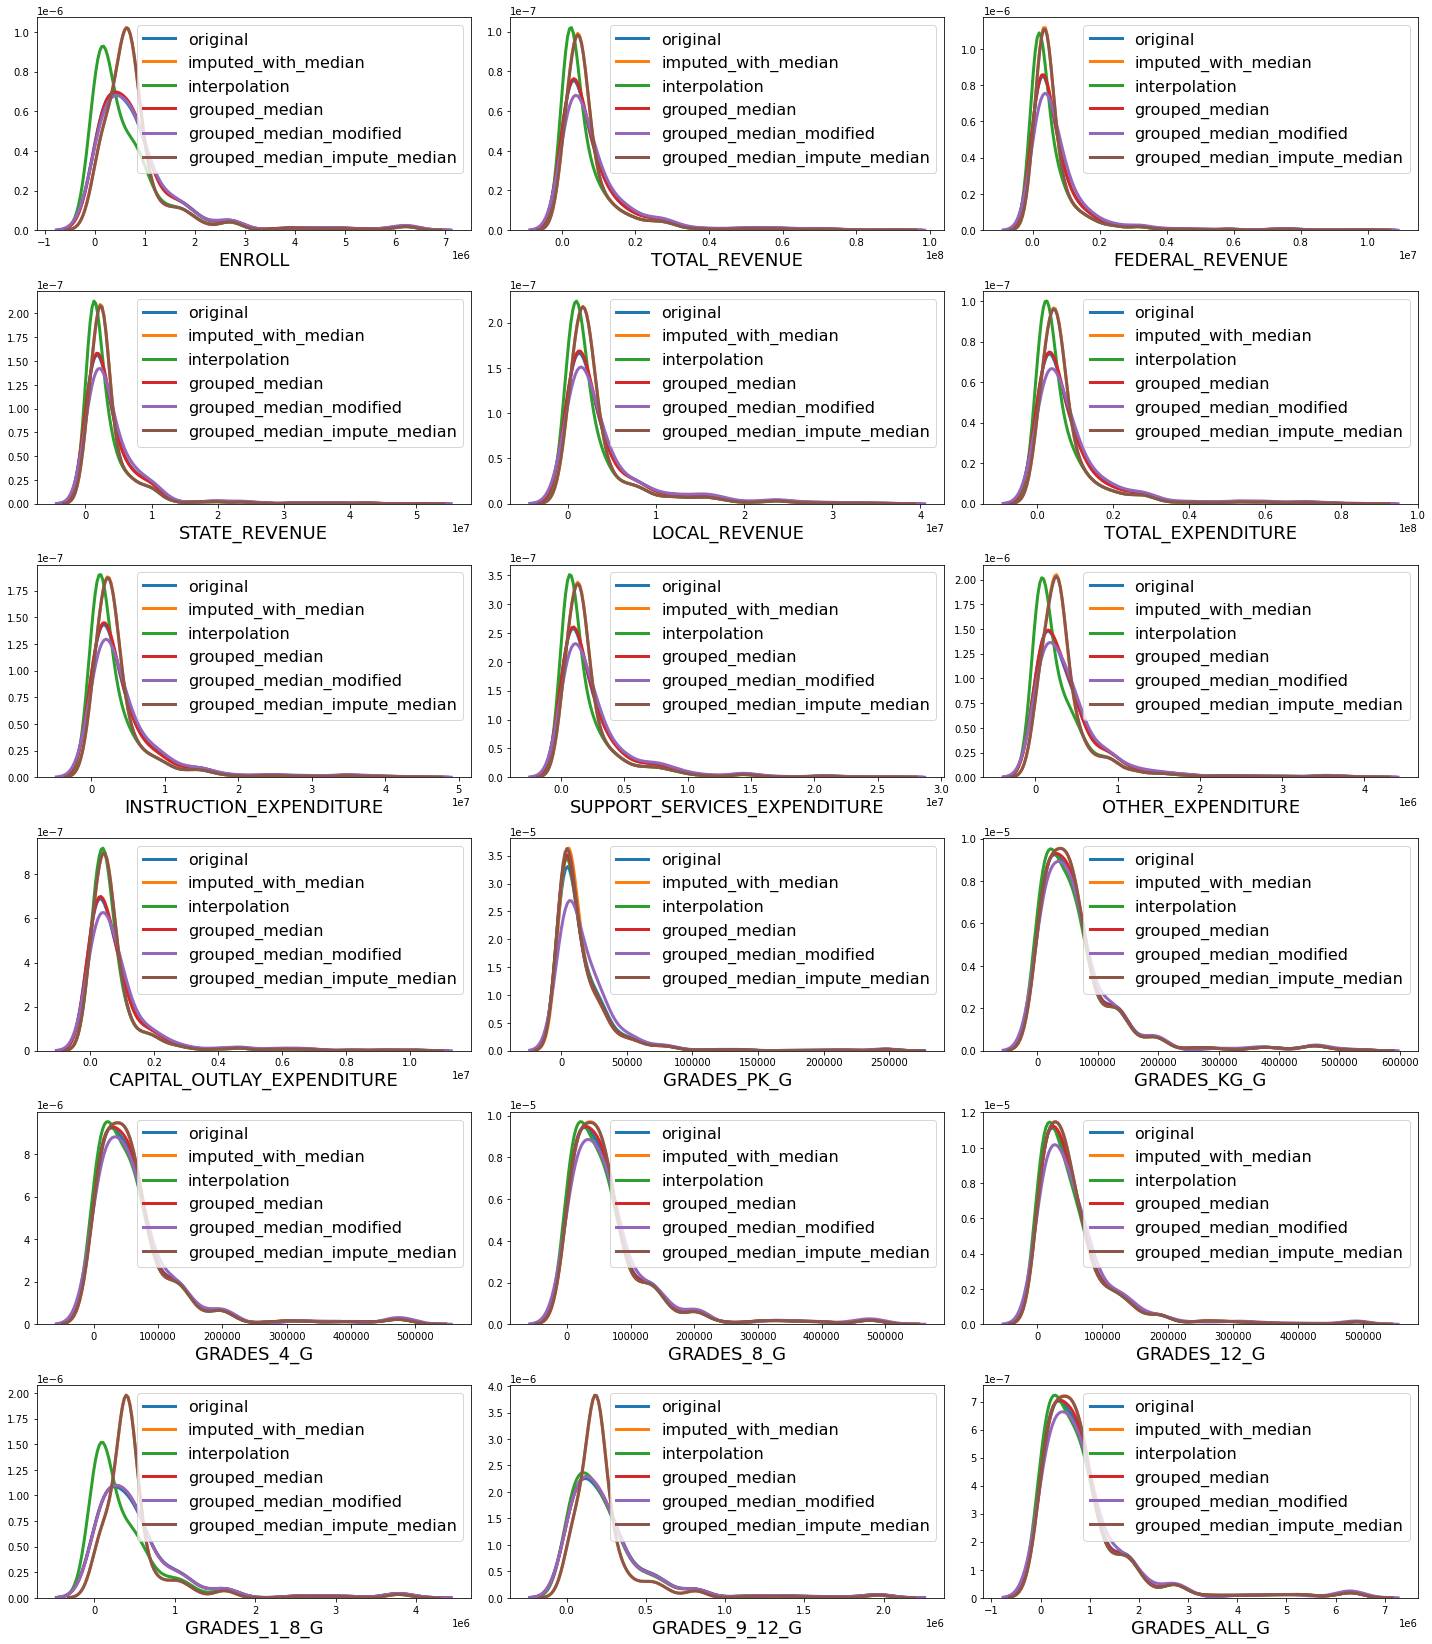

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

k=0
plt.figure(figsize=(20,30))

for col in df.columns:
  if col in df_datatype.index:
    k += 1
    plt.subplot(8,3,k)

    sns.kdeplot(df[col], label='original', linewidth=3)
    sns.kdeplot(df_impute_median[col], label = 'imputed_with_median', linewidth=3)
    sns.kdeplot(df_interpolate[col], label = 'interpolation', linewidth=3)
    sns.kdeplot(df_time_series[col], label = 'grouped_median', linewidth=3)
    sns.kdeplot(df_time_series_modified[col], label = 'grouped_median_modified', linewidth=3)
    sns.kdeplot(df_time_series_impute_median[col], label = 'grouped_median_impute_median', linewidth=3)
    plt.xlabel(col, fontsize=18)
    plt.ylabel('', fontsize=18)
    plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
df_missingvalues = pd.concat([df.isnull().sum(),
                              df_impute_median.isnull().sum(),
                              df_interpolate.isnull().sum(),
                              df_time_series.isnull().sum()], axis=1)


df_missingvalues.columns = ['df_original',
                            'df_impute_median',
                            'df_interpolate',
                            'df_time_series']


df_missingvalues

df_original  df_impute_median  df_interpolate  \
PRIMARY_KEY                             0                 0               0   
STATE                                   0                 0               0   
YEAR                                    0                 0               0   
ENROLL                                491                 0              51   
TOTAL_REVENUE                         440                 0               0   
FEDERAL_REVENUE                       440                 0               0   
STATE_REVENUE                         440                 0               0   
LOCAL_REVENUE                         440                 0               0   
TOTAL_EXPENDITURE                     440                 0               0   
INSTRUCTION_EXPENDITURE               440                 0               0   
SUPPORT_SERVICES_EXPENDITURE          440                 0               0   
OTHER_EXPENDITURE                     491                 0              51   
CAPITAL_OUTLAY_EXPENDITURE            440                 0               0   
GRADES_PK_G                           173                 0               0   
GRADES_KG_G                            83                 0               0   
GRADES_4_G                             83                 0               0   
GRADES_8_G                             83                 0               0   
GRADES_12_G                            83                 0               0   
GRADES_1_8_G                          695                 0             255   
GRADES_9_12_G                         644                 0             255   
GRADES_ALL_G                           83                 0               0   

                              df_time_series  
PRIMARY_KEY                                0  
STATE                                      0  
YEAR                                       0  
ENROLL                                   467  
TOTAL_REVENUE                            414  
FEDERAL_REVENUE                          414  
STATE_REVENUE                            414  
LOCAL_REVENUE                            414  
TOTAL_EXPENDITURE                        414  
INSTRUCTION_EXPENDITURE                  414  
SUPPORT_SERVICES_EXPENDITURE             414  
OTHER_EXPENDITURE                        467  
CAPITAL_OUTLAY_EXPENDITURE               414  
GRADES_PK_G                               53  
GRADES_KG_G                               53  
GRADES_4_G                                53  
GRADES_8_G                                53  
GRADES_12_G                               53  
GRADES_1_8_G                             675  
GRADES_9_12_G                            622  
GRADES_ALL_G                              53

In [ ]:
#df.groupby('YEAR').count()

# **4. Detecting and dealing with Outliers**
"An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” Hawkins, Identification of Outliers <br>


Dealing with outliers require the knowledge of the characteristics of data and the requirement of the model in Machine learning problems.<br>



In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state-level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.<br>

Don't forget to apply the most suitable missing-value-filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!<br>


4.1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values? [Yes]()
<br>

4.2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.<br>

## 4.1.

Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values? [Yes]()
<br>

In [ ]:
df_time_series_impute_median.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

In [ ]:
df_new = df_time_series_impute_median.copy(deep=True)

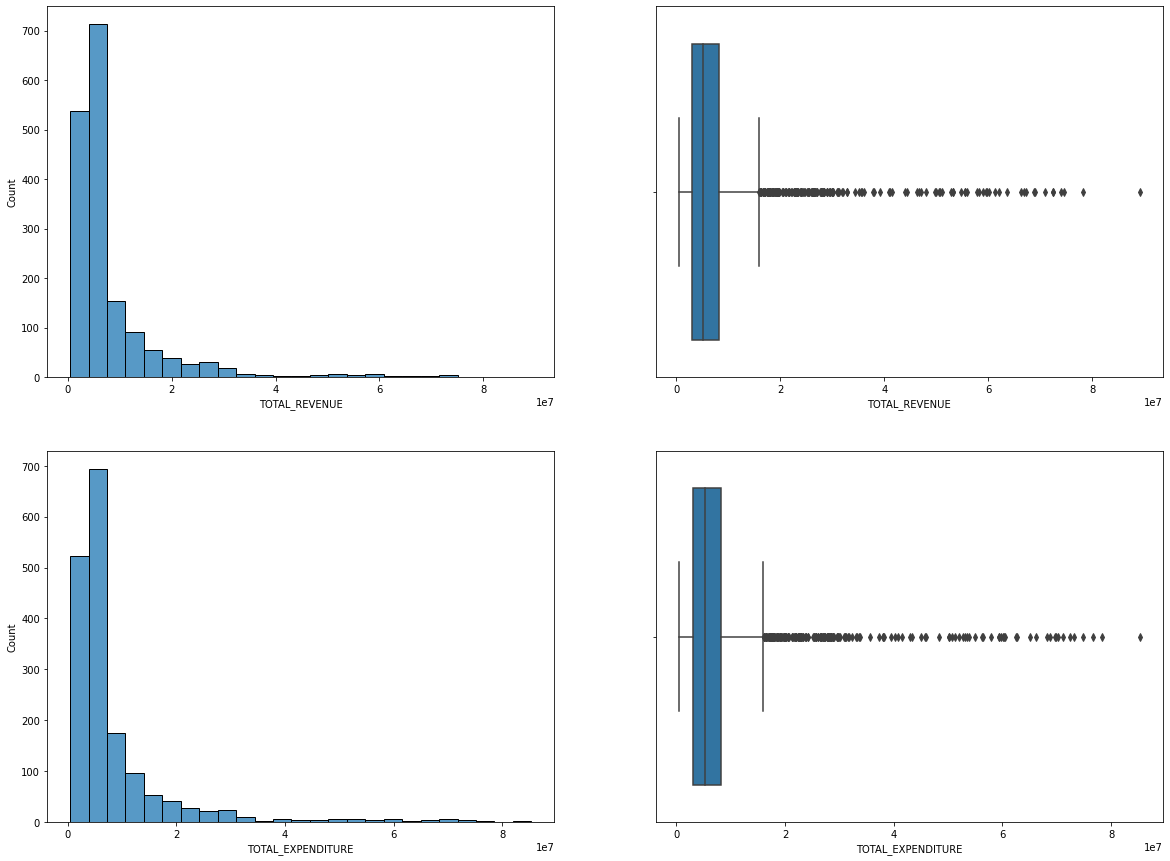

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,15))

sns.histplot(df_new['TOTAL_REVENUE'], ax=ax[0,0],bins=25)
sns.boxplot(data=df_new, x='TOTAL_REVENUE', ax=ax[0,1],whis=1.5)

sns.histplot(df_new['TOTAL_EXPENDITURE'], ax=ax[1,0],bins=25)
sns.boxplot(data=df_new, x='TOTAL_EXPENDITURE', ax=ax[1,1],whis=1.5)

In [ ]:
df_new['TOTAL_EXPENDITURE'].value_counts(bins=25, normalize=True)


(3875203.72, 7268742.44]      0.404665
(396826.531, 3875203.72]      0.304373
(7268742.44, 10662281.16]     0.102041
(10662281.16, 14055819.88]    0.055977
(14055819.88, 17449358.6]     0.030904
(17449358.6, 20842897.32]     0.023907
(20842897.32, 24236436.04]    0.016327
(27629974.76, 31023513.48]    0.013994
(24236436.04, 27629974.76]    0.012828
(31023513.48, 34417052.2]     0.005831
(37810590.92, 41204129.64]    0.003499
(58171823.24, 61565361.96]    0.003499
(68352439.4, 71745978.12]     0.002915
(47991207.08, 51384745.8]     0.002915
(51384745.8, 54778284.52]     0.002915
(54778284.52, 58171823.24]    0.002332
(71745978.12, 75139516.84]    0.001749
(64958900.68, 68352439.4]     0.001749
(41204129.64, 44597668.36]    0.001749
(44597668.36, 47991207.08]    0.001749
(61565361.96, 64958900.68]    0.001166
(34417052.2, 37810590.92]     0.001166
(75139516.84, 78533055.56]    0.001166
(81926594.28, 85320133.0]     0.000583
(78533055.56, 81926594.28]    0.000000
Name: TOTAL_EXPENDITURE, 

In [ ]:
df_new['TOTAL_REVENUE'].value_counts(bins=25, normalize=True)

(4015714.48, 7565778.96]      0.415743
(376898.387, 4015714.48]      0.313703
(7565778.96, 11115843.44]     0.089213
(11115843.44, 14665907.92]    0.053644
(14665907.92, 18215972.4]     0.031487
(18215972.4, 21766036.88]     0.022157
(25316101.36, 28866165.84]    0.017493
(21766036.88, 25316101.36]    0.015743
(28866165.84, 32416230.32]    0.010496
(57266681.68, 60816746.16]    0.003499
(50166552.72, 53716617.2]     0.003499
(32416230.32, 35966294.8]     0.003499
(46616488.24, 50166552.72]    0.002915
(71466939.6, 75017004.08]     0.002332
(35966294.8, 39516359.28]     0.002332
(53716617.2, 57266681.68]     0.002332
(64366810.64, 67916875.12]    0.001749
(67916875.12, 71466939.6]     0.001749
(43066423.76, 46616488.24]    0.001749
(60816746.16, 64366810.64]    0.001749
(39516359.28, 43066423.76]    0.001749
(75017004.08, 78567068.56]    0.000583
(85667197.52, 89217262.0]     0.000583
(78567068.56, 82117133.04]    0.000000
(82117133.04, 85667197.52]    0.000000
Name: TOTAL_REVENUE, dtyp

In [ ]:
df_new[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].describe()

TOTAL_REVENUE  TOTAL_EXPENDITURE
count   1.715000e+03       1.715000e+03
mean    8.087448e+06       8.194427e+06
std     1.028672e+07       1.048418e+07
min     4.656500e+05       4.816650e+05
25%     2.984292e+06       2.995256e+06
50%     5.128559e+06       5.245560e+06
75%     8.165744e+06       8.220253e+06
max     8.921726e+07       8.532013e+07

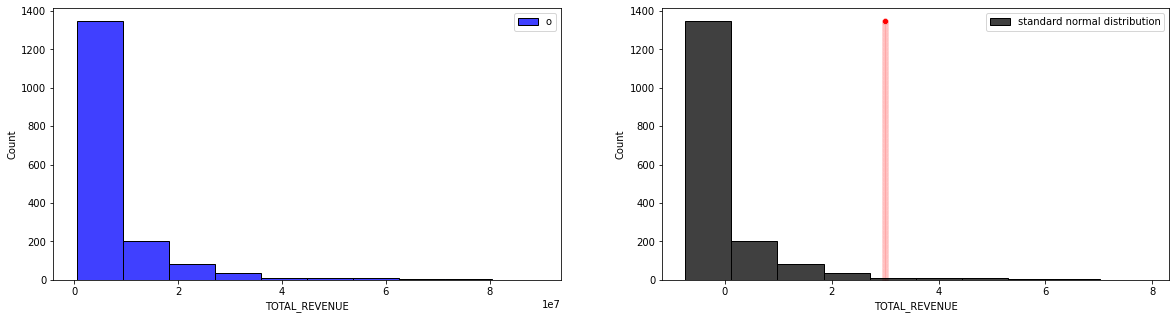

In [ ]:
from scipy.stats import zscore

z_score = zscore(df_new["TOTAL_REVENUE"])

fig, ax = plt.subplots(1,2,figsize=(20,5))

# plot Total_Revenue
sns.histplot(df_new["TOTAL_REVENUE"], color='blue', ax = ax[0], label = 'original distribution', bins=10)
ax[0].legend('original distribution')

# plot zscore of Total_Revenue
sns.histplot(z_score, color='black', ax = ax[1], label = 'standard normal distribution', bins=10)

#Line=pd.Series(np.ones(len(df_new))*3,index=df_new.index)
Line = pd.Series(np.ones(df_new['TOTAL_REVENUE'].value_counts(bins=10).iloc[0])*3,
                 range(df_new['TOTAL_REVENUE'].value_counts(bins=10).iloc[0]))
sns.scatterplot(x=Line.values,y=Line.index,ax = ax[1], color='red')
plt.legend()
plt.show()

In [ ]:
for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("The indices of the outliers:")
    #print(np.where(z_score > i))
    print("Number of outliers is: {}".format(len((np.where(z_score > i)[0]))))
    print('--'*40)

The score threshold is: 1
The indices of the outliers:
Number of outliers is: 164
--------------------------------------------------------------------------------
The score threshold is: 2
The indices of the outliers:
Number of outliers is: 70
--------------------------------------------------------------------------------
The score threshold is: 3
The indices of the outliers:
Number of outliers is: 43
--------------------------------------------------------------------------------
The score threshold is: 4
The indices of the outliers:
Number of outliers is: 33
--------------------------------------------------------------------------------


## 4.2.

If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.<br>

In [ ]:
from scipy.stats.mstats import winsorize
# replacing the 15% of the highest values
TOTAL_REVENUE_winsorization= winsorize(np.array(df_new['TOTAL_REVENUE']), (0, 0.15))
TOTAL_EXPENDITURE_winsorization= winsorize(np.array(df_new['TOTAL_EXPENDITURE'].dropna()), (0, 0.15))

pd.Series(TOTAL_REVENUE_winsorization).describe()

count    1.715000e+03
mean     5.991201e+06
std      3.873009e+06
min      4.656500e+05
25%      2.984292e+06
50%      5.128559e+06
75%      8.165744e+06
max      1.299936e+07
dtype: float64

In [ ]:
df_winsorize_comparison = pd.concat([df_new['TOTAL_REVENUE'].describe(),
           pd.Series(TOTAL_REVENUE_winsorization).describe()], axis=1)

df_winsorize_comparison.columns = ['TOTAL_REVENUE' , 'TOTAL REVENUE winsorized']

df_winsorize_comparison

TOTAL_REVENUE  TOTAL REVENUE winsorized
count   1.715000e+03              1.715000e+03
mean    8.087448e+06              5.991201e+06
std     1.028672e+07              3.873009e+06
min     4.656500e+05              4.656500e+05
25%     2.984292e+06              2.984292e+06
50%     5.128559e+06              5.128559e+06
75%     8.165744e+06              8.165744e+06
max     8.921726e+07              1.299936e+07

In [ ]:
df_winsorize_comparison = pd.concat([df_new['TOTAL_EXPENDITURE'].describe(),
           pd.Series(TOTAL_EXPENDITURE_winsorization).describe()], axis=1)

df_winsorize_comparison.columns = ['TOTAL_EXPENDITURE' , 'TOTAL EXPENDITURE winsorized']

df_winsorize_comparison

TOTAL_EXPENDITURE  TOTAL EXPENDITURE winsorized
count       1.715000e+03                  1.715000e+03
mean        8.194427e+06                  6.005416e+06
std         1.048418e+07                  3.806786e+06
min         4.816650e+05                  4.816650e+05
25%         2.995256e+06                  2.995256e+06
50%         5.245560e+06                  5.245560e+06
75%         8.220253e+06                  8.220253e+06
max         8.532013e+07                  1.279409e+07

Note that central tendency mean has changed significantly

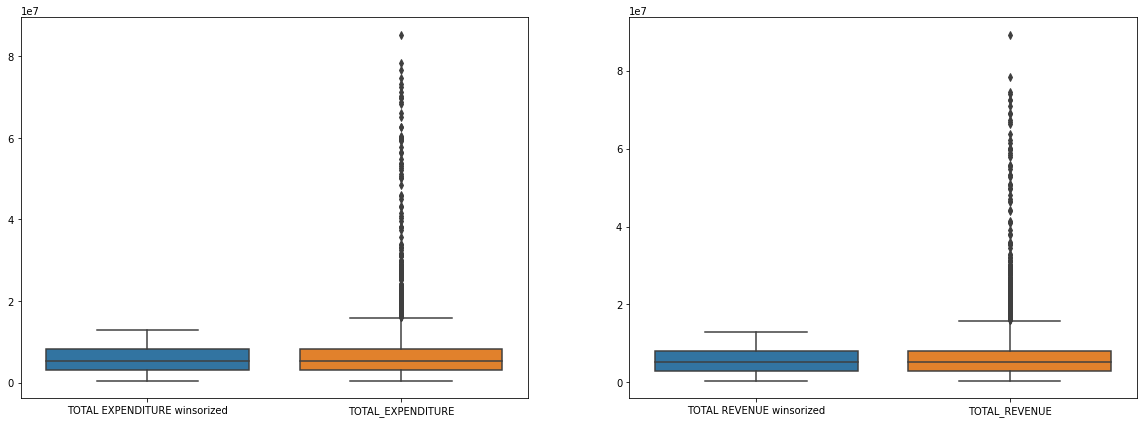

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,7))

data_EXPENDITURE = pd.concat([pd.Series(TOTAL_EXPENDITURE_winsorization),
                              df_new['TOTAL_EXPENDITURE']], axis=1)
data_EXPENDITURE.columns = ['TOTAL EXPENDITURE winsorized' , 'TOTAL_EXPENDITURE']

sns.boxplot(data = data_EXPENDITURE, ax=ax[0])

#######

data_REVENUE = pd.concat([pd.Series(TOTAL_REVENUE_winsorization),
                              df_new['TOTAL_REVENUE']], axis=1)

data_REVENUE.columns = ['TOTAL REVENUE winsorized' , 'TOTAL_REVENUE']

sns.boxplot(data = data_REVENUE, ax=ax[1])


Let's transform them by log transformation to narrow the range of values so that the impact of outliers on the entire data decreases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


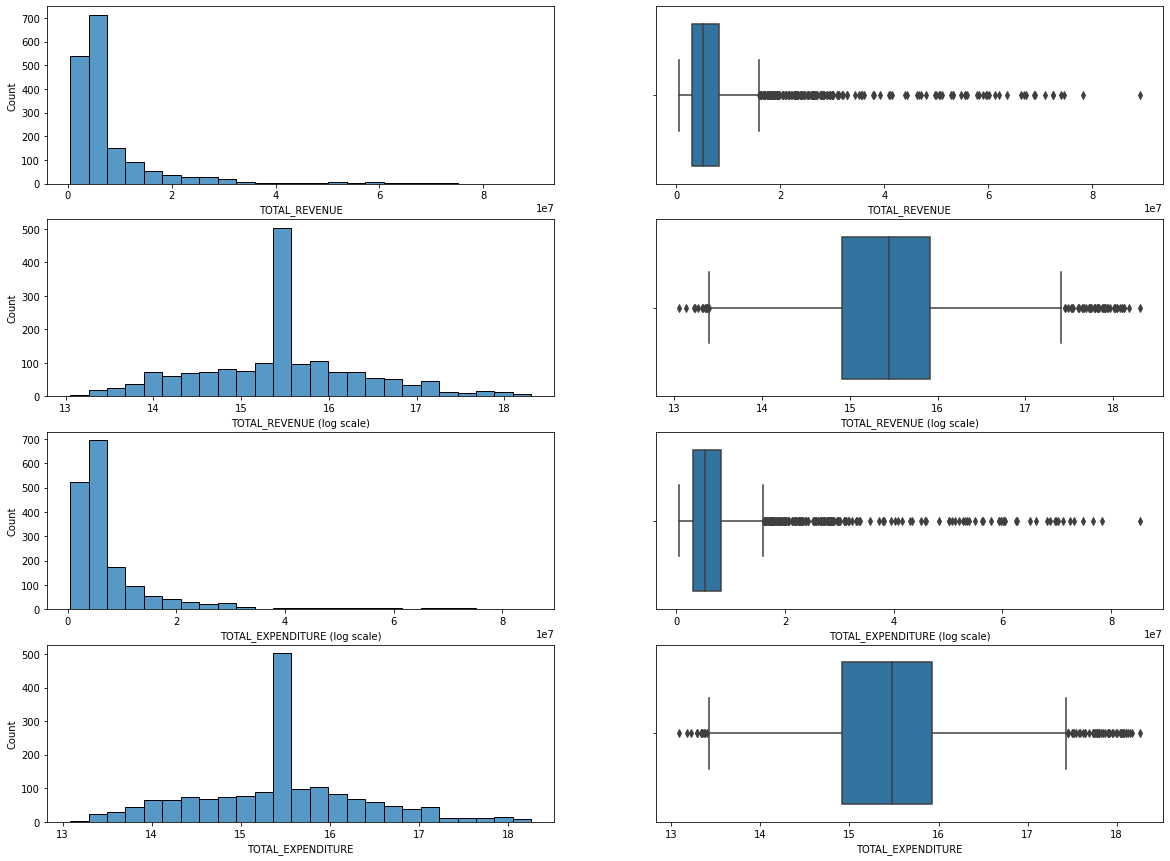

In [ ]:
fig, ax = plt.subplots(4,2,figsize=(20,15))

sns.histplot(df_new['TOTAL_REVENUE'], ax=ax[0,0],bins=25)
sns.boxplot(data=df_new, x='TOTAL_REVENUE', ax=ax[0,1],whis=1.5)

sns.histplot(np.log(df_new['TOTAL_REVENUE']), ax=ax[1,0],bins=25)
ax[1,0].set_xlabel('TOTAL_REVENUE (log scale)')

sns.boxplot(np.log(df_new['TOTAL_REVENUE']), ax=ax[1,1],whis=1.5)
ax[1,1].set_xlabel('TOTAL_REVENUE (log scale)')

#######
sns.histplot(df_new['TOTAL_EXPENDITURE'], ax=ax[2,0],bins=25)
sns.boxplot(data=df_new, x='TOTAL_EXPENDITURE', ax=ax[2,1],whis=1.5)


sns.histplot(np.log(df_new['TOTAL_EXPENDITURE']), ax=ax[3,0],bins=25)
ax[2,0].set_xlabel('TOTAL_EXPENDITURE (log scale)')
sns.boxplot(np.log(df_new['TOTAL_EXPENDITURE']), ax=ax[3,1],whis=1.5)
ax[2,1].set_xlabel('TOTAL_EXPENDITURE (log scale)')




plt.show()

In [ ]:
p25_log, p75_log = np.percentile(np.log(df_new['TOTAL_REVENUE']), [25 ,75])
p25, p75 = np.percentile(df_new['TOTAL_REVENUE'], [25 ,75])

IQR = p75 - p25
IQR_log = p75_log - p25_log

log_threshold_values=[]

for threshold_value in np.arange(1,5,0.5):
    min_value_log = p25_log - (IQR_log*threshold_value)
    max_value_log = p75_log + (IQR_log*threshold_value)
    min_value = p25 - (IQR*threshold_value)
    max_value = p75 + (IQR*threshold_value)

    outlier_value_number_log = len(np.where((np.log(df_new['TOTAL_REVENUE']) > max_value_log)|
                                       (np.log(df_new['TOTAL_REVENUE']) < min_value_log))[0])

    outlier_value_number = len(np.where((df_new['TOTAL_REVENUE'] > max_value)|
                                       (df_new['TOTAL_REVENUE'] < min_value))[0])

    log_threshold_values.append({'threshold_value': threshold_value,
                                 'outlier_value_number' : outlier_value_number,
                                 'outlier_value_number_log': outlier_value_number_log })


df_outliers = pd.DataFrame(log_threshold_values)
df_outliers

threshold_value  outlier_value_number  outlier_value_number_log
0              1.0                   246                       217
1              1.5                   195                        57
2              2.0                   161                        15
3              2.5                   131                         0
4              3.0                   111                         0
5              3.5                    90                         0
6              4.0                    70                         0
7              4.5                    54                         0

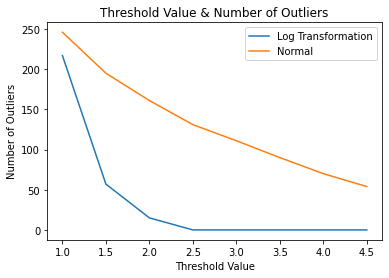

In [ ]:
df_outliers.plot(x = 'threshold_value', y=['outlier_value_number_log', 'outlier_value_number'])
plt.title('Threshold Value & Number of Outliers' )
plt.xlabel('Threshold Value' )
plt.ylabel('Number of Outliers')
plt.legend(('Log Transformation', 'Normal'))
plt.show()

## 4.3.

Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.<br>


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


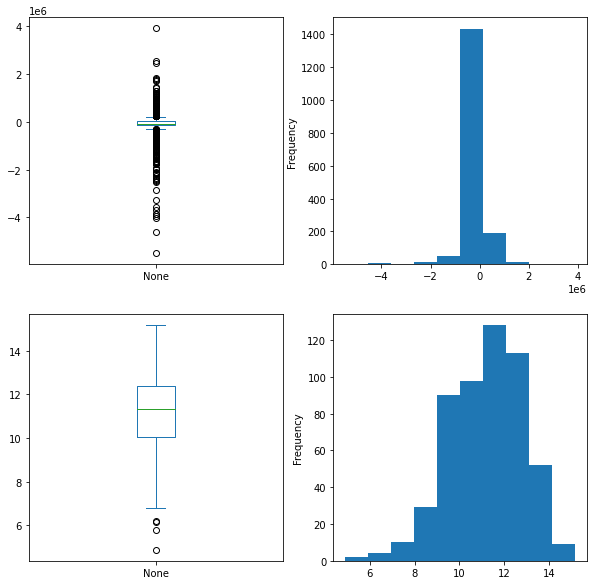

In [ ]:
deficit_df = df_new['TOTAL_REVENUE'] - df_new['TOTAL_EXPENDITURE']
fig, ax = plt.subplots(2,2)
deficit_df.plot(kind = 'box', figsize=(10,10), ax = ax[0,0])
deficit_df.plot(kind = 'hist', figsize=(10,10), ax = ax[0,1])

deficit_df_logscale = np.log(df_new['TOTAL_REVENUE'] - df_new['TOTAL_EXPENDITURE'])
deficit_df_logscale.plot(kind = 'box', figsize=(10,10), ax = ax[1,0])
deficit_df_logscale.plot(kind = 'hist', figsize=(10,10), ax = ax[1,1])

## 4.4.

Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.<br>

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


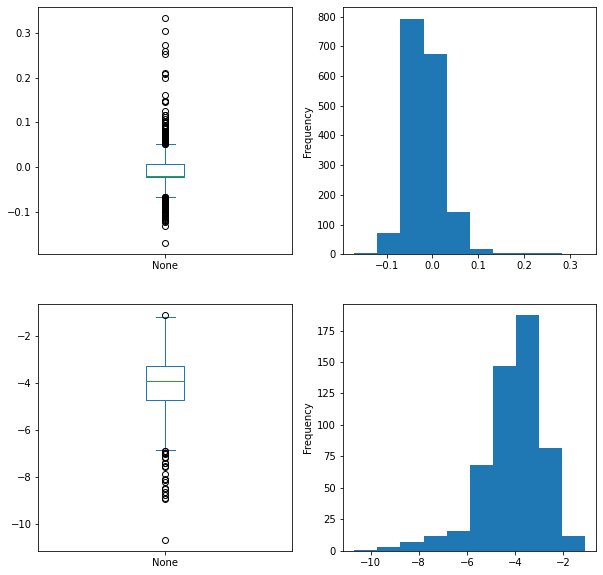

In [ ]:
deficit_df_log_individual = np.log(df_new['TOTAL_REVENUE']) - np.log(df_new['TOTAL_EXPENDITURE'])

fig, ax = plt.subplots(2,2)
deficit_df_log_individual.plot(kind = 'box', figsize=(10,10), ax = ax[0,0])
deficit_df_log_individual.plot(kind = 'hist', figsize=(10,10), ax = ax[0,1])


deficit_df_log_individual_log = np.log(np.log(df_new['TOTAL_REVENUE']) - np.log(df_new['TOTAL_EXPENDITURE']))

deficit_df_log_individual_log.plot(kind = 'box', figsize=(10,10), ax = ax[1,0])
deficit_df_log_individual_log.plot(kind = 'hist', figsize=(10,10), ax = ax[1,1])


count the number of outliers in all above cases.

## 4.5.

Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?<br>


In [ ]:
outlier_comparison_df = pd.concat([deficit_df.describe().describe(),
                                   deficit_df_logscale.describe(),
                                   deficit_df_log_individual.describe(),
                                   deficit_df_log_individual_log.describe().describe()],
                                   axis=1)

outlier_comparison_df.columns = ['original' , 'log_scale' , 'original_log' , 'original_log_logscale']

outlier_comparison_df

original   log_scale  original_log  original_log_logscale
count  8.000000e+00  535.000000   1715.000000               8.000000
mean  -1.744932e+05   11.211199     -0.010003              63.567937
std    2.545030e+06    1.627637      0.038865             190.517911
min   -5.487742e+06    4.890349     -0.170369             -10.671270
25%   -1.094848e+05   10.022261     -0.022557              -4.250587
50%   -4.790100e+04   11.333356     -0.020258              -3.582803
75%    1.378899e+05   12.399039      0.007139              -0.503694
max    3.897129e+06   15.175751      0.332627             535.000000

## 4.6.

If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?<br>
[log transformation should be applied.]()

# 5. Univariate Analysis

Univariate analyisis examines the variables individually by answering the following questions: <br>

- How many variables are in the data? <br>
- How many observations are in the dataset? <br>
- What are the types of the variables? <br>
- Is there any missing data or outlier? <br>
- Which type of distribution the variable has? <br>
- What is the descriptive statistics of the variable? this step helps to find an initial idea about the characteristics of the variable  <br>

***

describe() function from pandas library can generates descriptive statistics that summarize the central tendency (mean, standard deviation (high std means highly volatile), minimum and maximum), dispersion, and shape of a dataset’s distribution, excluding NaN values." <br>


***
In univariate analysis, one of the main task is to identify the distribution and as data scientists admire the normal distribution because many models and statistical tests assume the data to be normally distributed, non-normal distribution can be converted into normal one at the expense of losing information or we keep it and gain insights regarding the variable.

Data distribution can be visualized graphically. Indeed, by visualization, we may want to accomplish several different tasks such as checking and verifying distribution, detecting outliers, identifying pattern and so on.

One of the visulazation tool is Histogram, a tool that data scientists use to understand the distribution.


By removing outliers, by either winsorization or logarithmic transform, the distrintion will be shrinked on x-axis implying that the data is free from outliers.

**Assignments:** <br>

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. <br>

Don't forget to apply the most suitable missing-value-filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions (1-4) after you handle the missing values. <br>

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks: <br>

Answer the following questions as you work through this assignment, and then submit a link to your Notebook. <br>

5.1. Derive the descriptive statistics of the data and discuss the points you find remarkable. <br>

5.2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates. <br>

5.3. In your chosen state, in which of the lessons are the students more successful—math or reading? <br>

5.4. What are the distributions of the math and reading scores in the sample? <br>


5.5  Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.<br>

## 5.1.  

Derive the descriptive statistics of the data and discuss the points you find remarkable. <br>

In [ ]:
df_time_series_impute_median.describe()

YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1715.000000  1.715000e+03   1.715000e+03     1.715000e+03   
mean   2002.075219  8.417369e+05   8.087448e+06     6.766907e+05   
std       9.568621  9.088286e+05   1.028672e+07     1.001374e+06   
min    1986.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1994.000000  4.646880e+05   2.984292e+06     2.583140e+05   
50%    2002.000000  6.531095e+05   5.128559e+06     4.074320e+05   
75%    2010.000000  8.694485e+05   8.165744e+06     6.804845e+05   
max    2019.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.715000e+03   1.715000e+03       1.715000e+03   
mean    3.793996e+06   3.583356e+06       8.194427e+06   
std     4.841430e+06   4.817695e+06       1.048418e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.607318e+06   1.162580e+06       2.995256e+06   
50%     2.539380e+06   2.052565e+06       5.245560e+06   
75%     3.854242e+06   3.484108e+06       8.220253e+06   
max     5.090457e+07   3.610526e+07       8.532013e+07   

       INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
count             1.715000e+03                  1.715000e+03   
mean              4.229369e+06                  2.389240e+06   
std               5.509846e+06                  2.938022e+06   
min               2.655490e+05                  1.399630e+05   
25%               1.560664e+06                  8.882895e+05   
50%               2.659448e+06                  1.530694e+06   
75%               4.133618e+06                  2.442635e+06   
max               4.396452e+07                  2.605802e+07   

       OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE    GRADES_PK_G  \
count       1.715000e+03                1.715000e+03    1715.000000   
mean        3.858048e+05                8.021914e+05   16579.561808   
std         4.571972e+05                1.159295e+06   28739.470574   
min         1.154100e+04                1.270800e+04      96.000000   
25%         1.607065e+05                2.557805e+05    1991.000000   
50%         2.741930e+05                5.100910e+05    7281.000000   
75%         4.082920e+05                8.122720e+05   19689.000000   
max         3.995951e+06                1.022366e+07  256222.000000   

         GRADES_KG_G     GRADES_4_G     GRADES_8_G    GRADES_12_G  \
count    1715.000000    1715.000000    1715.000000    1715.000000   
mean    67830.273469   68201.404082   67179.019825   57508.918367   
std     78814.776763   78115.676319   76166.426880   65911.487861   
min      5122.000000    4577.000000    3371.000000    2572.000000   
25%     20944.000000   20486.500000   20518.500000   17949.000000   
50%     48157.000000   49153.000000   48934.000000   39388.000000   
75%     75726.000000   77052.000000   76719.500000   68023.000000   
max    535379.000000  493415.000000  500143.000000  498403.000000   

       GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  
count  1.715000e+03   1.715000e+03  1.715000e+03  
mean   5.073002e+05   2.460352e+05  9.014897e+05  
std    5.280500e+05   2.653998e+05  1.031504e+06  
min    3.769800e+04   1.353000e+04  6.844900e+04  
25%    3.158105e+05   1.457900e+05  2.800010e+05  
50%    4.036870e+05   1.861110e+05  6.545260e+05  
75%    4.815905e+05   2.528075e+05  1.002840e+06  
max    3.929869e+06   2.013687e+06  6.441557e+06

In [ ]:
df_time_series_impute_median.describe(include = 'O')

PRIMARY_KEY    STATE
count           1715     1715
unique          1715       53
top     1992_ALABAMA  ALABAMA
freq               1       33

## 5.2.

Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates. <br>

In [ ]:
df_new = df_time_series_impute_median.set_index('YEAR', drop=True)
df_new.head()

PRIMARY_KEY       STATE    ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
YEAR                                                                          
1992     1992_ALABAMA     ALABAMA  653109.5      2678885.0         304177.0   
1992      1992_ALASKA      ALASKA  653109.5      1049591.0         106780.0   
1992     1992_ARIZONA     ARIZONA  653109.5      3258079.0         297888.0   
1992    1992_ARKANSAS    ARKANSAS  653109.5      1711959.0         178571.0   
1992  1992_CALIFORNIA  CALIFORNIA  653109.5     26260025.0        2072470.0   

      STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
YEAR                                                    
1992      1659028.0       715680.0          2653798.0   
1992       720711.0       222100.0           972488.0   
1992      1369815.0      1590376.0          3401580.0   
1992       958785.0       574603.0          1743022.0   
1992     16546514.0      7641041.0         27138832.0   

      INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
YEAR                                                          
1992                1481703.0                      735036.0   
1992                 498362.0                      350902.0   
1992                1435908.0                     1007732.0   
1992                 964323.0                      483488.0   
1992               14358922.0                     8520926.0   

      OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  GRADES_PK_G  GRADES_KG_G  \
YEAR                                                                            
1992           274193.0                    174053.0       8224.0      55460.0   
1992           274193.0                     37451.0       2371.0      10152.0   
1992           274193.0                    609114.0       2544.0      53497.0   
1992           274193.0                    145212.0        808.0      33511.0   
1992           274193.0                   2044688.0      59067.0     431763.0   

      GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  \
YEAR                                                                     
1992     57948.0     58025.0      41167.0      403687.0       186111.0   
1992      9748.0      8789.0       6714.0      403687.0       186111.0   
1992     55433.0     49081.0      37410.0      403687.0       186111.0   
1992     34632.0     36011.0      27651.0      403687.0       186111.0   
1992    418418.0    363296.0     270675.0      403687.0       186111.0   

      GRADES_ALL_G  
YEAR                
1992      731634.0  
1992      122487.0  
1992      673477.0  
1992      441490.0  
1992     5254844.0

In [ ]:
df_new.sort_index(inplace=True)

In [ ]:
df_new['STATE'].value_counts()

ALABAMA                 33
OKLAHOMA                33
KANSAS                  33
MISSOURI                33
OREGON                  33
NORTH_CAROLINA          33
UTAH                    33
WYOMING                 33
WISCONSIN               33
ALASKA                  33
WEST_VIRGINIA           33
WASHINGTON              33
ARIZONA                 33
VIRGINIA                33
VERMONT                 33
PENNSYLVANIA            33
ARKANSAS                33
TEXAS                   33
TENNESSEE               33
CALIFORNIA              33
IOWA                    33
SOUTH_DAKOTA            33
SOUTH_CAROLINA          33
RHODE_ISLAND            33
COLORADO                33
INDIANA                 33
KENTUCKY                33
LOUISIANA               33
ILLINOIS                33
OHIO                    33
NORTH_DAKOTA            33
DELAWARE                33
NEW_YORK                33
DISTRICT_OF_COLUMBIA    33
NEW_MEXICO              33
NEW_JERSEY              33
NEW_HAMPSHIRE           33
F

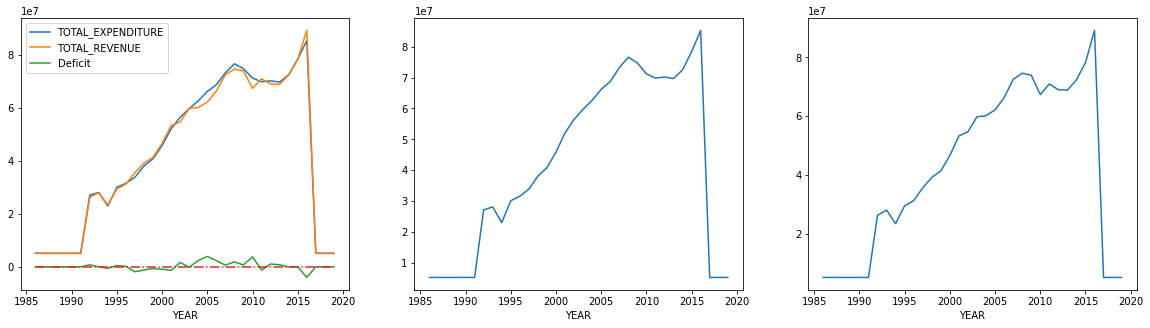

In [ ]:
df_new['Deficit'] = df_new['TOTAL_EXPENDITURE'] - df_new['TOTAL_REVENUE']

fig, ax = plt.subplots(1,3, figsize = (20, 5))
df_new.loc[df_new['STATE'] == 'CALIFORNIA' ,
           ['TOTAL_EXPENDITURE' , 'TOTAL_REVENUE' , 'Deficit']].plot(kind = 'line', ax = ax[0])

x = df_new.loc[df_new['STATE'] == 'CALIFORNIA' , 'Deficit']
xx = np.zeros(len(x))
ax[0].plot(x.index, xx, ls= '-.')

df_new.loc[df_new['STATE'] == 'CALIFORNIA' ,
           'TOTAL_EXPENDITURE'].plot(kind = 'line', ax = ax[1])


df_new.loc[df_new['STATE'] == 'CALIFORNIA' ,
           'TOTAL_REVENUE'].plot(kind = 'line', ax = ax[2])

[Click here](https://lao.ca.gov/Publications/Report/3630) to find out a History of California’s Budget Reserves

## 5.3.  
In your chosen state, in which of the lessons are the students more successful—math or reading? <br>

[click here](https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project) to find out the variables' description in Kaggle

In [ ]:
File_Name = file_locator('states_all.csv')

df_for_grades = pd.read_csv(File_Name)
df_for_grades.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
0                      735036.0                NaN   
1                      350902.0                NaN   
2                     1007732.0                NaN   
3                      483488.0                NaN   
4                     8520926.0                NaN   

   CAPITAL_OUTLAY_EXPENDITURE  GRADES_PK_G  GRADES_KG_G  GRADES_4_G  \
0                    174053.0       8224.0      55460.0     57948.0   
1                     37451.0       2371.0      10152.0      9748.0   
2                    609114.0       2544.0      53497.0     55433.0   
3                    145212.0        808.0      33511.0     34632.0   
4                   2044688.0      59067.0     431763.0    418418.0   

   GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  \
0     58025.0      41167.0           NaN            NaN      731634.0   
1      8789.0       6714.0           NaN            NaN      122487.0   
2     49081.0      37410.0           NaN            NaN      673477.0   
3     36011.0      27651.0           NaN            NaN      441490.0   
4    363296.0     270675.0           NaN            NaN     5254844.0   

   AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0             208.0             252.0                207.0   
1               NaN               NaN                  NaN   
2             215.0             265.0                209.0   
3             210.0             256.0                211.0   
4             208.0             261.0                202.0   

   AVG_READING_8_SCORE  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [ ]:
df_for_grades.loc[df_for_grades['STATE'] == 'CALIFORNIA' ,
                  ['AVG_MATH_4_SCORE' , 'AVG_MATH_8_SCORE' , 'AVG_READING_4_SCORE' , 'AVG_READING_8_SCORE']].describe()

AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
count         11.000000         12.000000            13.000000   
mean         227.909091        269.166667           208.230769   
std            8.960519          6.965282             5.614770   
min          208.000000        256.000000           197.000000   
25%          228.500000        265.500000           206.000000   
50%          232.000000        270.000000           209.000000   
75%          233.000000        275.250000           213.000000   
max          235.000000        277.000000           216.000000   

       AVG_READING_8_SCORE  
count            11.000000  
mean            255.000000  
std               4.898979  
min             250.000000  
25%             251.000000  
50%             253.000000  
75%             259.000000  
max             263.000000

In the state of california, in average, students performed better in mathematics.

In [ ]:
# filter the required portion of data, group it by year and find the statistical description
# With this method you will find in which years student did better in math vs reading.
grades_comparision = df_for_grades.loc[df_for_grades['STATE'] == 'CALIFORNIA' ,
                  ['AVG_MATH_4_SCORE' ,
                   'AVG_MATH_8_SCORE' ,
                   'AVG_READING_4_SCORE' ,
                   'AVG_READING_8_SCORE',
                   'YEAR']].groupby('YEAR').describe()

grades_comparision

AVG_MATH_4_SCORE                                                \
                count   mean std    min    25%    50%    75%    max   
YEAR                                                                  
1986              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1987              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1988              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1989              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1990              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1991              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1992              1.0  208.0 NaN  208.0  208.0  208.0  208.0  208.0   
1993              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1994              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1995              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1996              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1997              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1998              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1999              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2000              1.0  213.0 NaN  213.0  213.0  213.0  213.0  213.0   
2001              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2002              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2003              1.0  227.0 NaN  227.0  227.0  227.0  227.0  227.0   
2004              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2005              1.0  230.0 NaN  230.0  230.0  230.0  230.0  230.0   
2006              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2007              1.0  230.0 NaN  230.0  230.0  230.0  230.0  230.0   
2008              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2009              1.0  232.0 NaN  232.0  232.0  232.0  232.0  232.0   
2010              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2011              1.0  234.0 NaN  234.0  234.0  234.0  234.0  234.0   
2012              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2013              1.0  234.0 NaN  234.0  234.0  234.0  234.0  234.0   
2014              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2015              1.0  232.0 NaN  232.0  232.0  232.0  232.0  232.0   
2016              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2017              1.0  232.0 NaN  232.0  232.0  232.0  232.0  232.0   
2019              1.0  235.0 NaN  235.0  235.0  235.0  235.0  235.0   

     AVG_MATH_8_SCORE                                                \
                count   mean std    min    25%    50%    75%    max   
YEAR                                                                  
1986              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1987              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1988              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1989              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1990              1.0  256.0 NaN  256.0  256.0  256.0  256.0  256.0   
1991              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1992              1.0  261.0 NaN  261.0  261.0  261.0  261.0  261.0   
1993              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1994              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1995              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1996              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1997              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1998              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
1999              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2000              1.0  260.0 NaN  260.0  260.0  260.0  260.0  260.0   
2001              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2002              0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
2003              1.0  267.0

Notive that there are many missing values in this variables (more than 50%), let's remove then.



In [ ]:
# keep the rows with at lest 8 values
grades_comparision.dropna(thresh=8).transpose()

YEAR                        1990   1992   1994   1998   2000   2002   2003  \
AVG_MATH_4_SCORE    count    0.0    1.0    0.0    0.0    1.0    0.0    1.0   
                    mean     NaN  208.0    NaN    NaN  213.0    NaN  227.0   
                    std      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
                    min      NaN  208.0    NaN    NaN  213.0    NaN  227.0   
                    25%      NaN  208.0    NaN    NaN  213.0    NaN  227.0   
                    50%      NaN  208.0    NaN    NaN  213.0    NaN  227.0   
                    75%      NaN  208.0    NaN    NaN  213.0    NaN  227.0   
                    max      NaN  208.0    NaN    NaN  213.0    NaN  227.0   
AVG_MATH_8_SCORE    count    1.0    1.0    0.0    0.0    1.0    0.0    1.0   
                    mean   256.0  261.0    NaN    NaN  260.0    NaN  267.0   
                    std      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
                    min    256.0  261.0    NaN    NaN  260.0    NaN  267.0   
                    25%    256.0  261.0    NaN    NaN  260.0    NaN  267.0   
                    50%    256.0  261.0    NaN    NaN  260.0    NaN  267.0   
                    75%    256.0  261.0    NaN    NaN  260.0    NaN  267.0   
                    max    256.0  261.0    NaN    NaN  260.0    NaN  267.0   
AVG_READING_4_SCORE count    0.0    1.0    1.0    1.0    0.0    1.0    1.0   
                    mean     NaN  202.0  197.0  202.0    NaN  206.0  206.0   
                    std      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
                    min      NaN  202.0  197.0  202.0    NaN  206.0  206.0   
                    25%      NaN  202.0  197.0  202.0    NaN  206.0  206.0   
                    50%      NaN  202.0  197.0  202.0    NaN  206.0  206.0   
                    75%      NaN  202.0  197.0  202.0    NaN  206.0  206.0   
                    max      NaN  202.0  197.0  202.0    NaN  206.0  206.0   
AVG_READING_8_SCORE count    0.0    0.0    0.0    1.0    0.0    1.0    1.0   
                    mean     NaN    NaN    NaN  252.0    NaN  250.0  251.0   
                    std      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
                    min      NaN    NaN    NaN  252.0    NaN  250.0  251.0   
                    25%      NaN    NaN    NaN  252.0    NaN  250.0  251.0   
                    50%      NaN    NaN    NaN  252.0    NaN  250.0  251.0   
                    75%      NaN    NaN    NaN  252.0    NaN  250.0  251.0   
                    max      NaN    NaN    NaN  252.0    NaN  250.0  251.0   

YEAR                        2005   2007   2009   2011   2013   2015   2017  \
AVG_MATH_4_SCORE    count    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                    mean   230.0  230.0  232.0  234.0  234.0  232.0  232.0   
                    std      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
                    min    230.0  230.0  232.0  234.0  234.0  232.0  232.0   
                    25%    230.0  230.0  232.0  234.0  234.0  232.0  232.0   
                    50%    230.0  230.0  232.0  234.0  234.0  232.0  232.0   
                    75%    230.0  230.0  232.0  234.0  234.0  232.0  232.0   
                    max    230.0  230.0  232.0  234.0  234.0  232.0  232.0   
AVG_MATH_8_SCORE    count    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                    mean   269.0  270.0  270.0  273.0  276.0  275.0  277.0   
                    std      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
                    min    269.0  270.0  270.0  273.0  276.0  275.0  277.0   
                    25%    269.0  270.0  270.0  273.0  276.0  275.0  277.0   
                    50%    269.0  270.0  270.0  273.0  276.0  275.0  277.0   
                    75%    269.0  270.0  270.0  273.0  276.0  275.0  277.0   
                    max    269.0  270.0  270.0  273.0  276.0  275.0  277.0   
AVG_READING_4_SCORE count    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
                    m

## 5.4.

What are the distributions of the math and reading scores in the sample? <br>

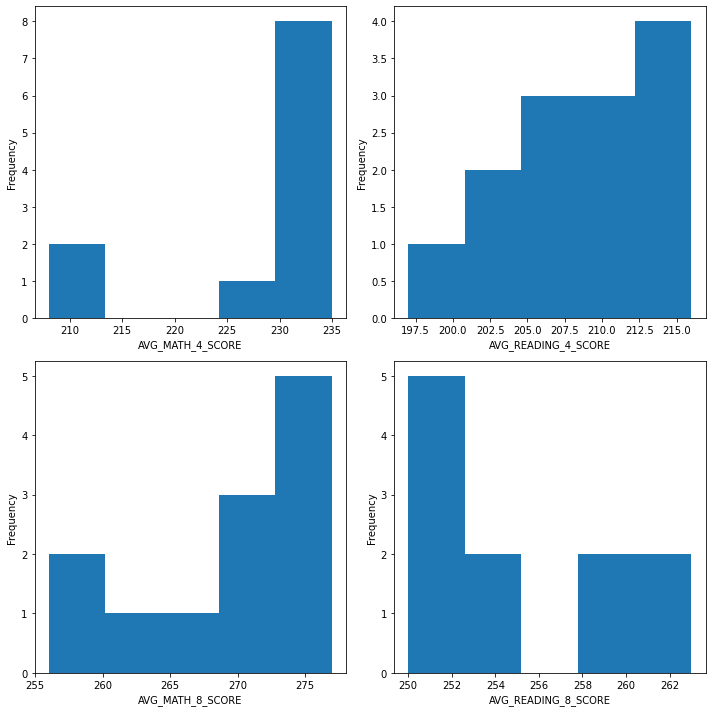

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
df_for_grades.loc[df_for_grades['STATE'] == 'CALIFORNIA' ,'AVG_MATH_4_SCORE'].plot(kind = 'hist' ,
                                                                                   bins = 5,
                                                                                   ax = ax[0,0])

df_for_grades.loc[df_for_grades['STATE'] == 'CALIFORNIA' ,'AVG_READING_4_SCORE'].plot(kind = 'hist' ,
                                                                                   bins = 5,
                                                                                   ax = ax[0,1])

df_for_grades.loc[df_for_grades['STATE'] == 'CALIFORNIA' ,'AVG_MATH_8_SCORE'].plot(kind = 'hist' ,
                                                                                   bins = 5,
                                                                                   ax = ax[1,0])

df_for_grades.loc[df_for_grades['STATE'] == 'CALIFORNIA' ,'AVG_READING_8_SCORE'].plot(kind = 'hist' ,
                                                                                   bins = 5,
                                                                                   ax = ax[1,1])


ax[0,0].set_xlabel('AVG_MATH_4_SCORE')
ax[0,1].set_xlabel('AVG_READING_4_SCORE')
ax[1,0].set_xlabel('AVG_MATH_8_SCORE')
ax[1,1].set_xlabel('AVG_READING_8_SCORE')

plt.tight_layout()
plt.show()

## 5.5

Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.<br>

In [ ]:
# impute with median
df_for_grades_imputed_median = df_for_grades.copy(deep=True)

for col in ['AVG_MATH_4_SCORE' , 'AVG_MATH_8_SCORE' , 'AVG_READING_4_SCORE' , 'AVG_READING_8_SCORE']:
    df_for_grades_imputed_median[col] = df_for_grades_imputed_median[col].fillna(df_for_grades_imputed_median[col].median())

In [ ]:
# impute with mean
df_for_grades_imputed_mean = df_for_grades.copy(deep=True)

for col in ['AVG_MATH_4_SCORE' , 'AVG_MATH_8_SCORE' , 'AVG_READING_4_SCORE' , 'AVG_READING_8_SCORE']:
    df_for_grades_imputed_mean[col] = df_for_grades_imputed_mean[col].fillna(df_for_grades_imputed_mean[col].mean())

In [ ]:
# interpolation
df_for_grades_interpolated = df_for_grades.copy(deep=True)

for col in ['AVG_MATH_4_SCORE' , 'AVG_MATH_8_SCORE' , 'AVG_READING_4_SCORE' , 'AVG_READING_8_SCORE']:
    df_for_grades_interpolated[col] = df_for_grades_interpolated[col].interpolate(method = 'linear' , limit_direction ='forward')


In [ ]:
def dist_visuliazation(df, title):

    title = title
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    df.loc[df['STATE'] == 'CALIFORNIA' ,'AVG_MATH_4_SCORE'].plot(kind = 'hist' ,
                                                                 bins = 5,
                                                                 ax = ax[0])

    df.loc[df['STATE'] == 'CALIFORNIA' ,'AVG_READING_4_SCORE'].plot(kind = 'hist' ,
                                                                    bins = 5,
                                                                    ax = ax[1])

    df.loc[df['STATE'] == 'CALIFORNIA' ,'AVG_MATH_8_SCORE'].plot(kind = 'hist' ,
                                                                 bins = 5,
                                                                 ax = ax[2])

    df.loc[df['STATE'] == 'CALIFORNIA' ,'AVG_READING_8_SCORE'].plot(kind = 'hist' ,
                                                                     bins = 5,
                                                                     ax = ax[3])


    ax[0].set_xlabel('AVG_MATH_4_SCORE')
    ax[0].set_title(f'{title}')

    ax[1].set_xlabel('AVG_READING_4_SCORE')
    ax[1].set_title(f'{title}')

    ax[2].set_xlabel('AVG_MATH_8_SCORE')
    ax[2].set_title(f'{title}')

    ax[3].set_xlabel('AVG_READING_8_SCORE')
    ax[3].set_title(f'{title}')

    plt.tight_layout()
    plt.show()

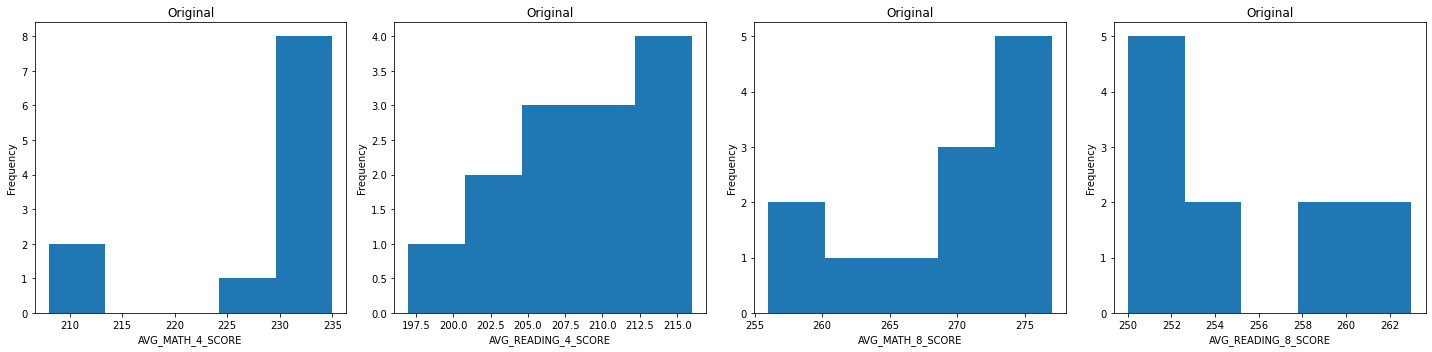

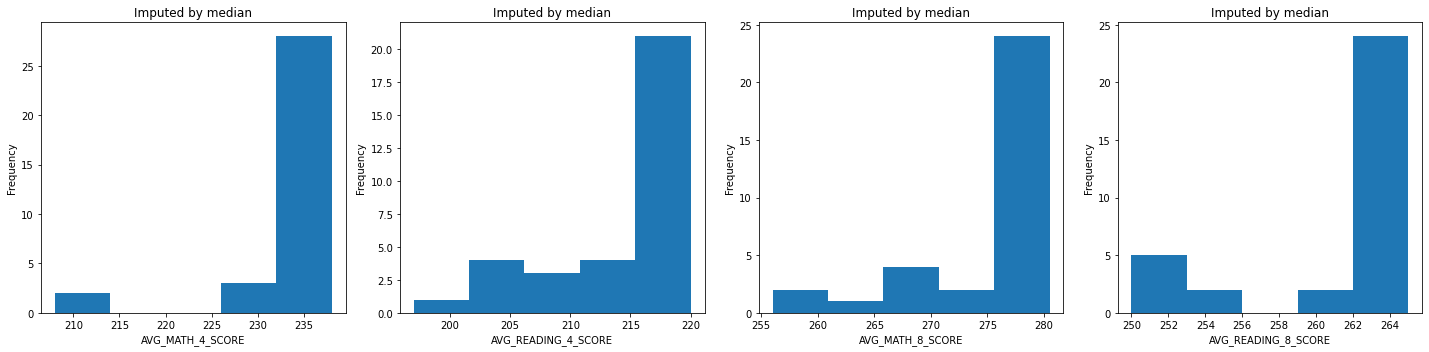

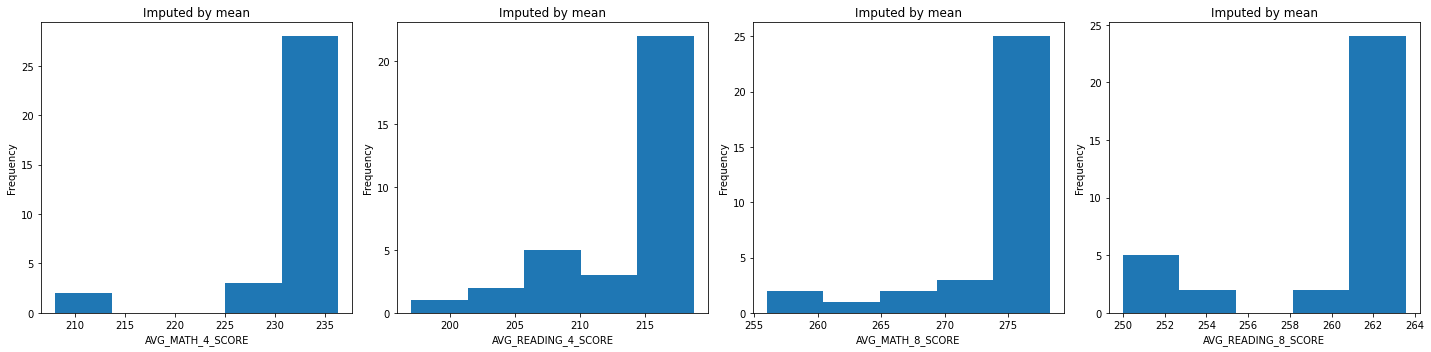

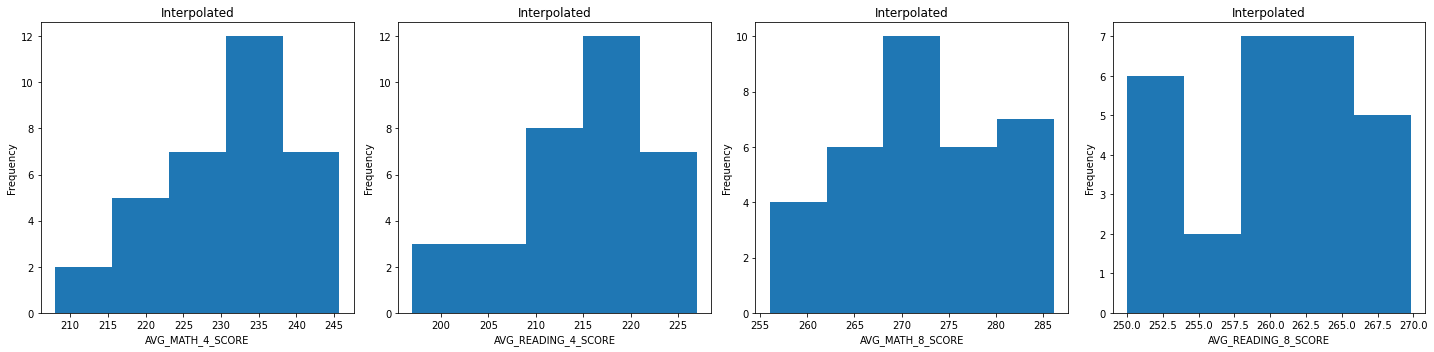

In [ ]:
dist_visuliazation(df_for_grades, title = 'Original')
dist_visuliazation(df_for_grades_imputed_median,  title ='Imputed by median')
dist_visuliazation(df_for_grades_imputed_mean,  title ='Imputed by mean')
dist_visuliazation(df_for_grades_interpolated,  title ='Interpolated')

# 6. Multivariate Analysis Assignment

In this assignment, you will continue to study the data of the US Education System (dataset). You can reach the explanations of this data from Kaggle again.
<br>

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.<br>

<br>

6.1. Does the performance in the exams vary according to gender, origin and education level of parents?<br>

6.2. Does lunch type have a relationship with exam performances? How can you explain this, if any?<br>

6.3. Does the preparation courses have an impact on exam performance?<br>

6.4. Which lessons are most correlated with each other?

## 6.1.
Does the performance in the exams vary according to gender, origin and education level of parents?<br>

In [ ]:
File_Name = file_locator('states_all_extended 2.csv')

df_extended = pd.read_csv(File_Name)
df_extended .head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
0                      735036.0                NaN   
1                      350902.0                NaN   
2                     1007732.0                NaN   
3                      483488.0                NaN   
4                     8520926.0                NaN   

   CAPITAL_OUTLAY_EXPENDITURE      A_A_A   G01_A_A   G02_A_A   G03_A_A  \
0                    174053.0   731634.0   58168.0   56139.0   59481.0   
1                     37451.0   122487.0   11030.0   10585.0   10135.0   
2                    609114.0   673477.0   58914.0   56814.0   55630.0   
3                    145212.0   441490.0   34929.0   34517.0   34044.0   
4                   2044688.0  5254844.0  443955.0  436488.0  424961.0   

    G04_A_A   G05_A_A   G06_A_A   G07_A_A   G08_A_A   G09_A_A   G10_A_A  \
0   57948.0   58970.0   59929.0   62904.0   58025.0   60590.0   50629.0   
1    9748.0    9896.0    9542.0    9392.0    8789.0    9187.0    7889.0   
2   55433.0   54630.0   53832.0   52793.0   49081.0   51426.0   46790.0   
3   34632.0   34740.0   35017.0   37448.0   36011.0   33518.0   32700.0   
4  418418.0  410701.0  399776.0  388439.0  363296.0  396482.0  375327.0   

    G11_A_A   G12_A_A    KG_A_A   PK_A_A  G01-G08_A_A  G09-G12_A_A  G01_AM_F  \
0   44000.0   41167.0   55460.0   8224.0          NaN          NaN       NaN   
1    7057.0    6714.0   10152.0   2371.0          NaN          NaN       NaN   
2   39584.0   37410.0   53497.0   2544.0          NaN          NaN       NaN   
3   29244.0   27651.0   33511.0    808.0          NaN          NaN       NaN   
4  329527.0  270675.0  431763.0  59067.0          NaN          NaN       NaN   

   G01_AM_M  G01_AS_F  G01_AS_M  G01_BL_F  G01_BL_M  G01_HI_F  G01_HI_M  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   G01_HP_F  G01_HP_M  G01_TR_F  G01_TR_M  G01_WH_F  G01_WH_M  G02_AM_F  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   G02_AM_M  G02_AS_F  G02_AS_M  G02_BL_F  G02_BL_M  G02_HI_F  G02_HI_M  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN 

In [ ]:
df_extended.isna().sum()*100/len(df_extended )

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
A_A_A                            4.839650
G01_A_A                          4.839650
G02_A_A                          4.839650
G03_A_A                          4.839650
G04_A_A                          4.839650
G05_A_A                          4.839650
G06_A_A                          4.839650
G07_A_A                          4.839650
G08_A_A                          4.839650
G09_A_A                          4.839650
G10_A_A                          4

In [ ]:
df_extended.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 266 entries, PRIMARY_KEY to G08_TR_A_MATHEMATICS
dtypes: float64(263), int64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
df_extended.describe(include = 'O')

PRIMARY_KEY    STATE
count           1715     1715
unique          1715       53
top     1992_ALABAMA  ALABAMA
freq               1       33

In [ ]:
for col in df_extended.columns.to_list():
  if col not in ['PRIMARY_KEY' , 'STATE']:
    df_extended[col] = df_extended[col].fillna(df_extended[col].median())

## 6.2.
Does lunch type have a relationship with exam performances? How can you explain this, if any?<br>

## 6.3.
Does the preparation courses have an impact on exam performance?<br>

## 6.4.

Which lessons are most correlated with each other?

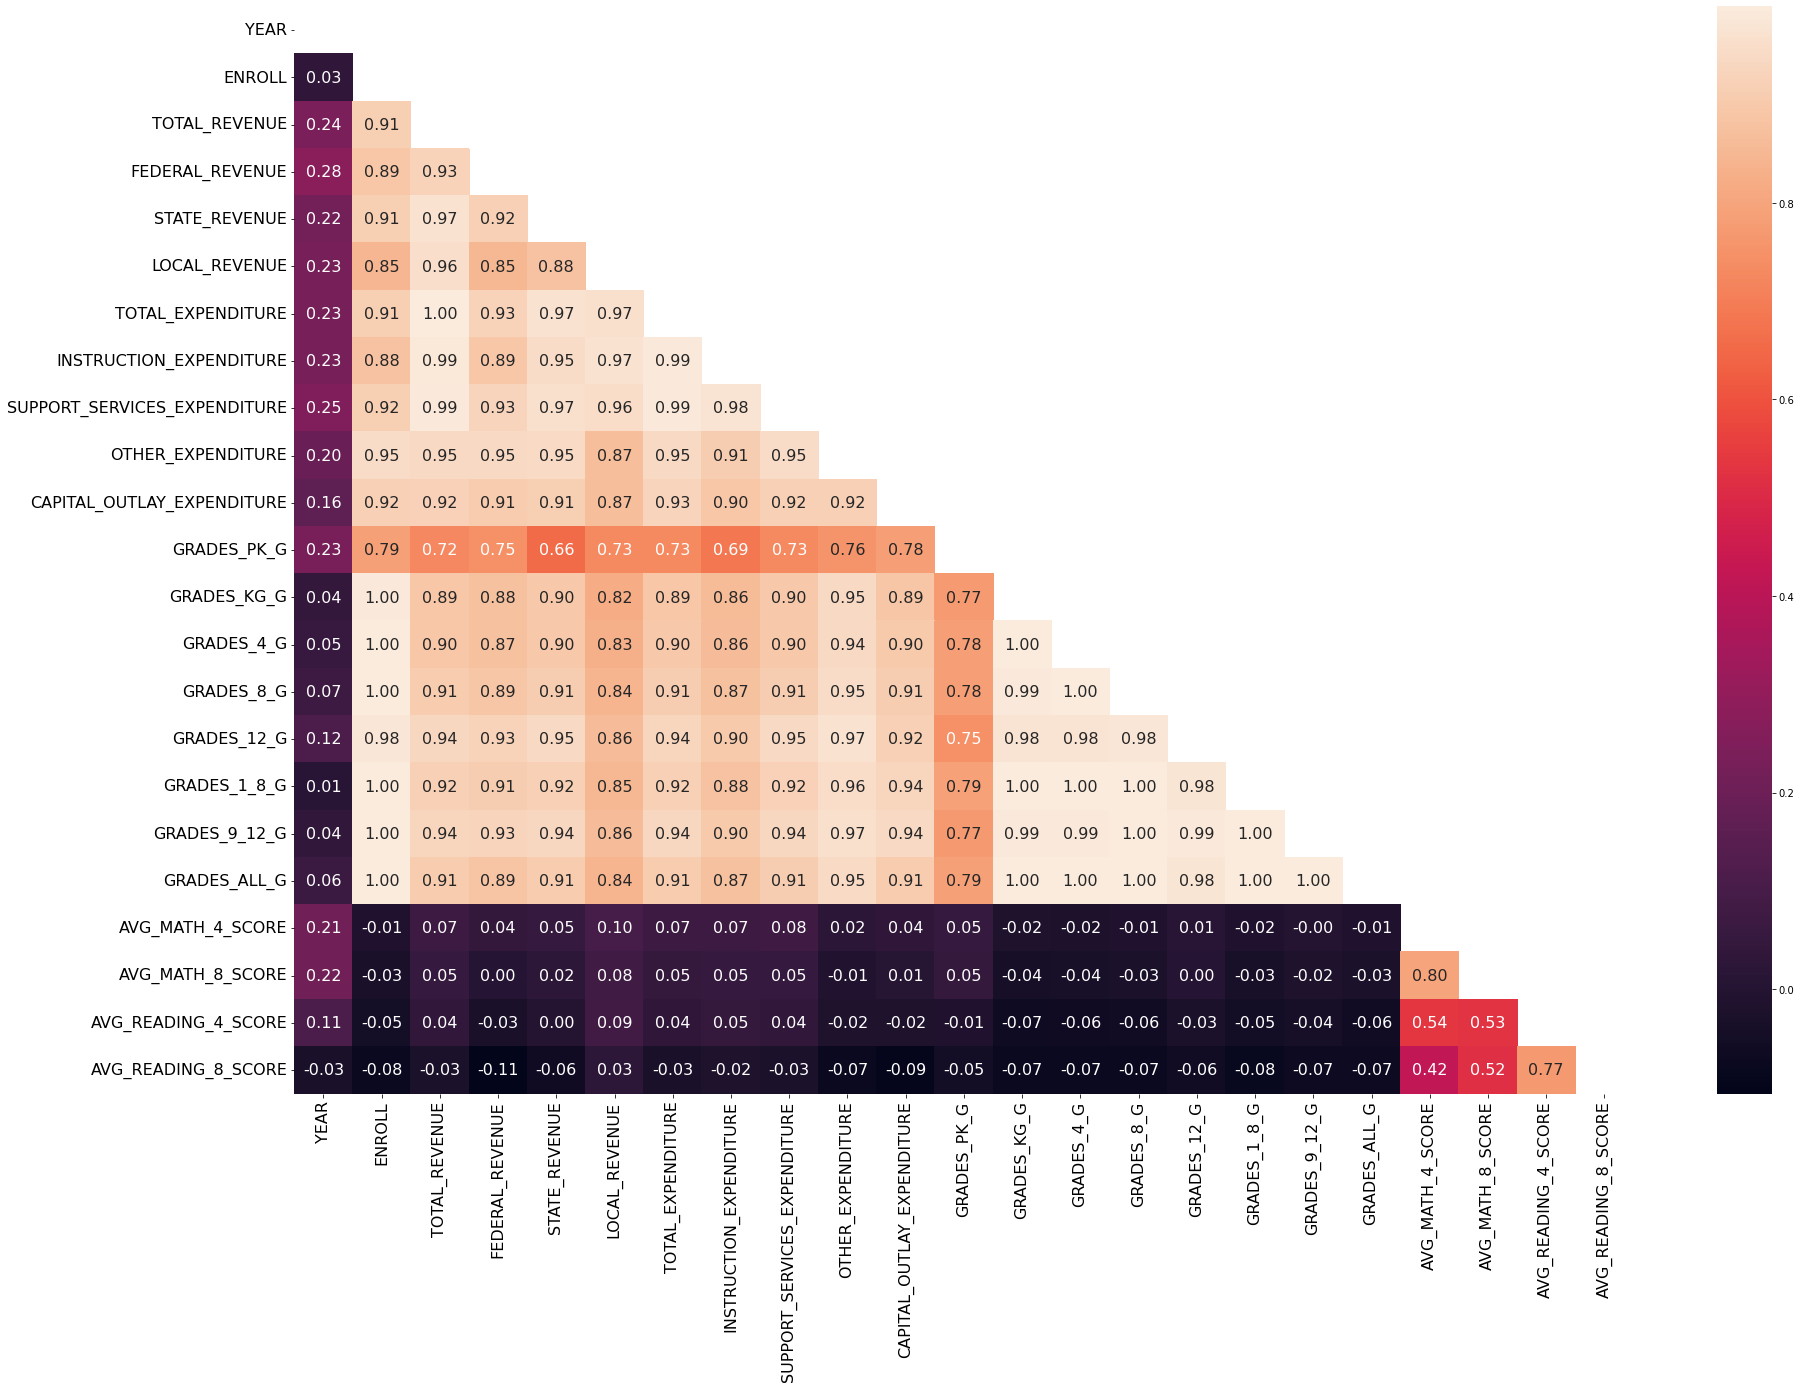

In [ ]:
from scipy.stats import pearsonr

plt.figure(figsize=(30,20))

mask = np.triu(df_for_grades_imputed_median.corr())
sns.heatmap(df_for_grades_imputed_median.corr(),
            mask=mask,
            annot=True,
            annot_kws={'size': 16},
            fmt='.2f')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()
# data will not be shown in cells where mask is True

In [ ]:
cor_table = df_for_grades_imputed_median.corr()

cor_table

YEAR    ENROLL  TOTAL_REVENUE  \
YEAR                          1.000000  0.034500       0.237340   
ENROLL                        0.034500  1.000000       0.913978   
TOTAL_REVENUE                 0.237340  0.913978       1.000000   
FEDERAL_REVENUE               0.276818  0.893697       0.928356   
STATE_REVENUE                 0.221331  0.914379       0.972579   
LOCAL_REVENUE                 0.226828  0.846851       0.964968   
TOTAL_EXPENDITURE             0.230611  0.914920       0.999023   
INSTRUCTION_EXPENDITURE       0.229207  0.880675       0.990362   
SUPPORT_SERVICES_EXPENDITURE  0.248308  0.917475       0.994848   
OTHER_EXPENDITURE             0.196138  0.953018       0.947008   
CAPITAL_OUTLAY_EXPENDITURE    0.164540  0.918076       0.924552   
GRADES_PK_G                   0.232897  0.786993       0.724446   
GRADES_KG_G                   0.043170  0.995072       0.892412   
GRADES_4_G                    0.053736  0.997529       0.895529   
GRADES_8_G                    0.072686  0.998371       0.908364   
GRADES_12_G                   0.117276  0.983393       0.939707   
GRADES_1_8_G                  0.011977  0.999096       0.919819   
GRADES_9_12_G                 0.038047  0.997224       0.938923   
GRADES_ALL_G                  0.062752  0.998879       0.907394   
AVG_MATH_4_SCORE              0.211587 -0.011332       0.073768   
AVG_MATH_8_SCORE              0.215226 -0.029002       0.050236   
AVG_READING_4_SCORE           0.113314 -0.048019       0.037629   
AVG_READING_8_SCORE          -0.029257 -0.076975      -0.027154   

                              FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  \
YEAR                                 0.276818       0.221331       0.226828   
ENROLL                               0.893697       0.914379       0.846851   
TOTAL_REVENUE                        0.928356       0.972579       0.964968   
FEDERAL_REVENUE                      1.000000       0.920708       0.848962   
STATE_REVENUE                        0.920708       1.000000       0.880103   
LOCAL_REVENUE                        0.848962       0.880103       1.000000   
TOTAL_EXPENDITURE                    0.928689       0.970049       0.965364   
INSTRUCTION_EXPENDITURE              0.893742       0.954454       0.969876   
SUPPORT_SERVICES_EXPENDITURE         0.931735       0.968800       0.957046   
OTHER_EXPENDITURE                    0.947400       0.950481       0.869888   
CAPITAL_OUTLAY_EXPENDITURE           0.907773       0.914920       0.865936   
GRADES_PK_G                          0.746690       0.658112       0.729332   
GRADES_KG_G                          0.878342       0.898232       0.820106   
GRADES_4_G                           0.874619       0.898295       0.827498   
GRADES_8_G                           0.887448       0.909776       0.840705   
GRADES_12_G                          0.928369       0.945648       0.863032   
GRADES_1_8_G                         0.913000       0.919280       0.849337   
GRADES_9_12_G                        0.931070       0.940813       0.864700   
GRADES_ALL_G                         0.885103       0.907637       0.841279   
AVG_MATH_4_SCORE                     0.040970       0.051435       0.097467   
AVG_MATH_8_SCORE                     0.002414       0.023996       0.082852   
AVG_READING_4_SCORE                 -0.031280       0.000698       0.086439   
AVG_READING_8_SCORE                 -0.106234      -0.061168       0.025866   

                              TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
YEAR                                   0.230611                 0.229207   
ENROLL                                 0.914920                 0.880675   
TOTAL_REVENUE                          0.999023                 0.990362   
FEDERAL_REVENUE                        0.928689                 0.893742   
STATE_REVENUE                          0.970049                 0.954454   
LOCAL_REVENUE                          0.965364                 0.969876

In [ ]:
for i in cor_table.iterrows():
  print(i)

In [ ]:
cor_table = df_for_grades_imputed_median.corr()

pvalue = []
cors = []

label = []
for row in cor_table.index:
  for col in cor_table.columns:
    if row != col:
      pvalue.append(pearsonr(df_for_grades_imputed_median.dropna()[row],
                             df_for_grades_imputed_median.dropna()[col])[1])

      cors.append(pearsonr(df_for_grades_imputed_median.dropna()[row],
                             df_for_grades_imputed_median.dropna()[col])[0])

      label.append(f'{row} - {col}')



In [ ]:
pval_table = pd.DataFrame({'corr': cors,
              'p_value' : pvalue}, index = label)


pval_table.sort_values(['corr' , 'p_value'], ascending=[False,True], inplace=True)
pval_table

corr        p_value
GRADES_4_G - GRADES_1_8_G                           0.999718   0.000000e+00
GRADES_1_8_G - GRADES_4_G                           0.999718   0.000000e+00
ENROLL - GRADES_ALL_G                               0.999611   0.000000e+00
GRADES_ALL_G - ENROLL                               0.999611   0.000000e+00
GRADES_1_8_G - GRADES_ALL_G                         0.999578   0.000000e+00
GRADES_ALL_G - GRADES_1_8_G                         0.999578   0.000000e+00
GRADES_8_G - GRADES_ALL_G                           0.999175   0.000000e+00
GRADES_ALL_G - GRADES_8_G                           0.999175   0.000000e+00
ENROLL - GRADES_1_8_G                               0.999085   0.000000e+00
GRADES_1_8_G - ENROLL                               0.999085   0.000000e+00
GRADES_4_G - GRADES_ALL_G                           0.999083   0.000000e+00
GRADES_ALL_G - GRADES_4_G                           0.999083   0.000000e+00
ENROLL - GRADES_8_G                                 0.998980   0.000000e+00
GRADES_8_G - ENROLL                                 0.998980   0.000000e+00
TOTAL_REVENUE - TOTAL_EXPENDITURE                   0.998965   0.000000e+00
TOTAL_EXPENDITURE - TOTAL_REVENUE                   0.998965   0.000000e+00
GRADES_8_G - GRADES_1_8_G                           0.998920   0.000000e+00
GRADES_1_8_G - GRADES_8_G                           0.998920   0.000000e+00
ENROLL - GRADES_4_G                                 0.998504   0.000000e+00
GRADES_4_G - ENROLL                                 0.998504   0.000000e+00
GRADES_4_G - GRADES_8_G                             0.998029   0.000000e+00
GRADES_8_G - GRADES_4_G                             0.998029   0.000000e+00
GRADES_8_G - GRADES_9_12_G                          0.997765   0.000000e+00
GRADES_9_12_G - GRADES_8_G                          0.997765   0.000000e+00
GRADES_KG_G - GRADES_1_8_G                          0.997620   0.000000e+00
GRADES_1_8_G - GRADES_KG_G                          0.997620   0.000000e+00
GRADES_KG_G - GRADES_ALL_G                          0.997556   0.000000e+00
GRADES_ALL_G - GRADES_KG_G                          0.997556   0.000000e+00
GRADES_KG_G - GRADES_4_G                            0.997232   0.000000e+00
GRADES_4_G - GRADES_KG_G                            0.997232   0.000000e+00
ENROLL - GRADES_9_12_G                              0.997167   0.000000e+00
GRADES_9_12_G - ENROLL                              0.997167   0.000000e+00
GRADES_9_12_G - GRADES_ALL_G                        0.997084   0.000000e+00
GRADES_ALL_G - GRADES_9_12_G                        0.997084   0.000000e+00
ENROLL - GRADES_KG_G                                0.996996   0.000000e+00
GRADES_KG_G - ENROLL                                0.996996   0.000000e+00
GRADES_KG_G - GRADES_8_G                            0.996099   0.000000e+00
GRADES_8_G - GRADES_KG_G                            0.996099   0.000000e+00
GRADES_1_8_G - GRADES_9_12_G                        0.995512   0.000000e+00
GRADES_9_12_G - GRADES_1_8_G                        0.995512   0.000000e+00
TOTAL_REVENUE - SUPPORT_SERVICES_EXPENDITURE        0.994587   0.000000e+00
SUPPORT_SERVICES_EXPENDITURE - TOTAL_REVENUE        0.994587   0.000000e+00
GRADES_4_G - GRADES_9_12_G                          0.994435   0.000000e+00
GRADES_9_12_G - GRADES_4_G                          0.994435   0.000000e+00
GRADES_12_G - GRADES_9_12_G                         0.994299   0.000000e+00
GRADES_9_12_G - GRADES_12_G                         0.994299   0.000000e+00
GRADES_KG_G - GRADES_9_12_G                         0.993909   0.000000e+00
GRADES_9_12_G - GRADES_KG_G                         0.993909   0.000000e+00
TOTAL_EXPENDITURE - SUPPORT_SERVICES_EXPENDITURE    0.992980   0.000000e+00
SUPPORT_SERVICES_EXPENDITURE - TOTAL_EXPENDITURE    0.992980   0.000000e+00
TOTAL_EXPENDITURE - INSTRUCTION_EXPENDITURE         0.990655   0.000000e+00
INSTRUCTION_EXPENDITURE - TOTAL_EXPENDITURE         0.990655   0.000000e+00
TOTAL_REVENUE - INSTRUCTION_

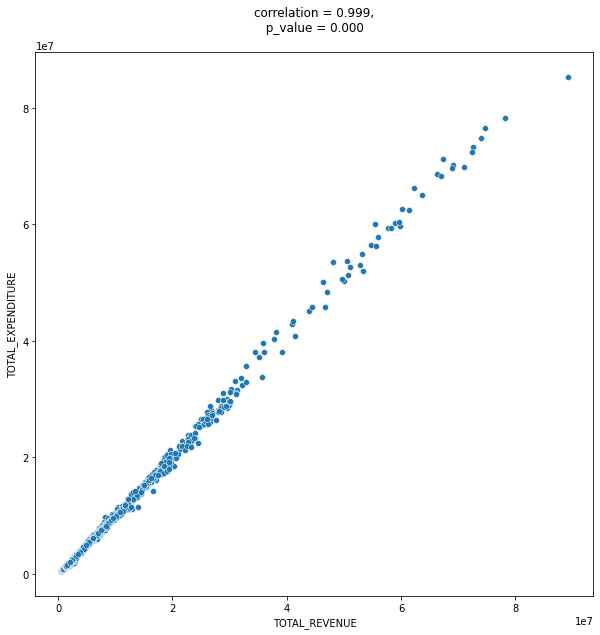

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df_for_grades_imputed_median['TOTAL_REVENUE'],
                y = df_for_grades_imputed_median['TOTAL_EXPENDITURE'])

plt.title(f"""correlation = {pval_table.loc['TOTAL_REVENUE - TOTAL_EXPENDITURE'][0]:.3f},
          p_value = {pval_table.loc['TOTAL_REVENUE - TOTAL_EXPENDITURE'][1]:.3f}
          """)
plt.show()